In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import load_model

# Scaling

In [2]:
# Define your scaling function
def custom_scaling(input_values):
    input_values_scaled = np.zeros_like(input_values, dtype=float)  # Initialize scaled data array
    input_values_scaled[:, 0] = (input_values[:, 0] - L_min) / (L_max - L_min)  # Scale L
    input_values_scaled[:, 1] = (input_values[:, 1] - C_min) / (C_max - C_min)  # Scale C
    input_values_scaled[:, 2] = (input_values[:, 2] - fsw_min) / (fsw_max - fsw_min)  # Scale fsw
    input_values_scaled[:, 3] = (input_values[:, 3] - t_dt_min) / (t_dt_max - t_dt_min) # Scale t_dt
    return input_values_scaled

# Define your scaling function
def custom_scaling_1(input_values):
    input_values_scaled = np.zeros_like(input_values, dtype=float)  # Initialize scaled data array
    input_values_scaled[:, 0] = (input_values[:, 0] - L_min) / (L_max - L_min)  # Scale L
    input_values_scaled[:, 1] = (input_values[:, 1] - C_min) / (C_max - C_min)  # Scale C
    input_values_scaled[:, 2] = (input_values[:, 2] - fsw_min) / (fsw_max - fsw_min)  # Scale fsw
    # input_values_scaled[:, 3] = (input_values[:, 3] - t_dt_min) / (t_dt_max - t_dt_min) # Scale t_dt
    return input_values_scaled

# Split Dataset

 ## Delta current
 

In [13]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
df_delta_current = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
# df_delta_current = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_delta_current = df_delta_current[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_delta_current = df_delta_current[["delta_current"]].values  # Adjust column names as per your dataset



# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_delta_current = custom_scaling(X_delta_current)
# print(X_scaled_delta_current[90:])

# Split the dataset into training, validation, and testing sets
X_train_delta_current, X_temp_delta_current, y_train_delta_current, y_temp_delta_current = train_test_split(X_scaled_delta_current, y_delta_current, test_size=0.3, random_state=42)
X_val_delta_current, X_test_delta_current, y_val_delta_current, y_test_delta_current = train_test_split(X_temp_delta_current, y_temp_delta_current, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_delta_current = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_delta_current = {}
maes_delta_current = {}
rmses_delta_current = {}
r2_scores_delta_current = {}
mapes_delta_current = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

Epoch 1/100, Loss: 10.52974796295166, Val Loss: 6.80632209777832
Epoch 2/100, Loss: 7.279175281524658, Val Loss: 4.503571510314941
Epoch 3/100, Loss: 6.694211959838867, Val Loss: 4.261472702026367
Epoch 4/100, Loss: 6.561142921447754, Val Loss: 4.222784042358398
Epoch 5/100, Loss: 6.557495594024658, Val Loss: 4.108861923217773
Epoch 6/100, Loss: 6.4746856689453125, Val Loss: 4.026815891265869
Epoch 7/100, Loss: 6.496545314788818, Val Loss: 4.081430912017822
Epoch 8/100, Loss: 6.451512813568115, Val Loss: 4.032947063446045
Epoch 9/100, Loss: 6.477647304534912, Val Loss: 4.254184246063232
Epoch 10/100, Loss: 6.386872291564941, Val Loss: 4.0785698890686035
Epoch 11/100, Loss: 6.38756799697876, Val Loss: 4.060362815856934
Restoring model weights from the end of the best epoch: 6.
Epoch 11: early stopping
750/750 [==============================] - 0s 479us/step - loss: 4.1076
Epoch 1/100, Loss: 10.4281005859375, Val Loss: 6.416794776916504
Epoch 2/100, Loss: 6.924053192138672, Val Loss: 4.2

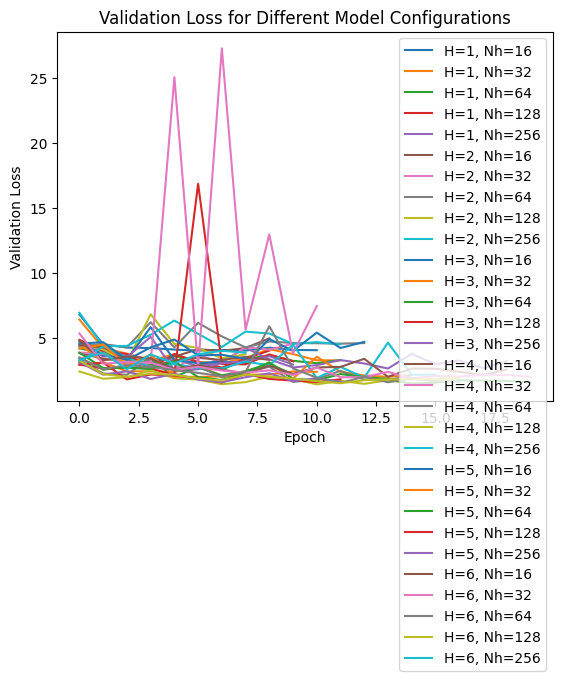

Model with H=1 and Nh=16:
MSE: 4.1075968742370605
MAE: 4.10759705106939
RMSE: 14.823651147082238
R-squared: 0.8813401138107658
MAPE: 34.424106748028464%
Model with H=1 and Nh=32:
MSE: 3.0845723152160645
MAE: 3.084573711938512
RMSE: 9.073827146648215
R-squared: 0.955539477803955
MAPE: 30.340952987180653%
Model with H=1 and Nh=64:
MSE: 2.6061692237854004
MAE: 2.6061688657186517
RMSE: 5.841731691076816
R-squared: 0.9815720609259061
MAPE: 30.15439289733079%
Model with H=1 and Nh=128:
MSE: 2.703568458557129
MAE: 2.7035676652817378
RMSE: 7.26113617240169
R-squared: 0.9715290001930884
MAPE: 34.17094722437915%
Model with H=1 and Nh=256:
MSE: 2.6507859230041504
MAE: 2.6507860295321186
RMSE: 4.915586660098906
R-squared: 0.9869519903418676
MAPE: 36.92261250516602%
Model with H=2 and Nh=16:
MSE: 3.162376880645752
MAE: 3.1623746088088494
RMSE: 7.48543511325095
R-squared: 0.9697428752600685
MAPE: 35.239755205086354%
Model with H=2 and Nh=32:
MSE: 2.698446750640869
MAE: 2.6984487413723315
RMSE: 8.591

In [7]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_delta_current = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_delta_current.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_delta_current.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_delta_current.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_delta_current.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_delta_current.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_delta_current.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_delta_current = model_delta_current.fit(X_train_delta_current, y_train_delta_current, epochs=100, batch_size=32, validation_data=(X_val_delta_current, y_val_delta_current), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_delta_current[(H, Nh)] = history_delta_current

        # Evaluate the model on the testing set
        predictions_delta_current = model_delta_current.predict(X_test_delta_current)

        # Evaluate the model on the testing set and calculate MSE
        mse_delta_current = model_delta_current.evaluate(X_test_delta_current, y_test_delta_current)
        mses_delta_current[(H, Nh)] = mse_delta_current

        # Calculate Mean Absolute Error (MAE)
        mae_delta_current = mean_absolute_error(y_test_delta_current, predictions_delta_current)
        maes_delta_current[(H, Nh)] = mae_delta_current

        # Calculate Root Mean Squared Error (RMSE)
        rmse_delta_current = np.sqrt(mean_squared_error(y_test_delta_current, predictions_delta_current))
        rmses_delta_current[(H, Nh)] = rmse_delta_current

        # Calculate R-squared (R2) Score
        r2_delta_current = r2_score(y_test_delta_current, predictions_delta_current)
        r2_scores_delta_current[(H, Nh)] = r2_delta_current

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_delta_current = np.mean(np.abs((y_test_delta_current - predictions_delta_current) / y_test_delta_current)) * 100
        mapes_delta_current[(H, Nh)] = mape_delta_current

# Plot the validation loss for each configuration
for (H, Nh), history_delta_current in histories_delta_current.items():
    plt.plot(history_delta_current.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_delta_current in mses_delta_current.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_delta_current}')
    print(f'MAE: {maes_delta_current[(H, Nh)]}')
    print(f'RMSE: {rmses_delta_current[(H, Nh)]}')
    print(f'R-squared: {r2_scores_delta_current[(H, Nh)]}')
    print(f'MAPE: {mapes_delta_current[(H, Nh)]}%')


In [9]:
# Rank combinations based on their MSE values
ranked_combinations_delta_current = sorted(mses_delta_current.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_delta_current) in enumerate(ranked_combinations_delta_current, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_delta_current}")


Rank 1: Combination H=5, Nh=64 - MSE: 1.4815806150436401
Rank 2: Combination H=4, Nh=128 - MSE: 1.5006414651870728
Rank 3: Combination H=6, Nh=128 - MSE: 1.5428262948989868
Rank 4: Combination H=6, Nh=64 - MSE: 1.5455348491668701
Rank 5: Combination H=5, Nh=256 - MSE: 1.5969994068145752
Rank 6: Combination H=5, Nh=128 - MSE: 1.6079319715499878
Rank 7: Combination H=4, Nh=64 - MSE: 1.6442921161651611
Rank 8: Combination H=3, Nh=32 - MSE: 1.9077246189117432
Rank 9: Combination H=6, Nh=32 - MSE: 1.9113237857818604
Rank 10: Combination H=3, Nh=64 - MSE: 2.0339584350585938
Rank 11: Combination H=5, Nh=32 - MSE: 2.0343143939971924
Rank 12: Combination H=4, Nh=256 - MSE: 2.059828042984009
Rank 13: Combination H=6, Nh=16 - MSE: 2.0630598068237305
Rank 14: Combination H=3, Nh=128 - MSE: 2.2241811752319336
Rank 15: Combination H=3, Nh=256 - MSE: 2.4846742153167725
Rank 16: Combination H=6, Nh=256 - MSE: 2.5543715953826904
Rank 17: Combination H=1, Nh=64 - MSE: 2.6061692237854004
Rank 18: Combina

In [13]:
# Specify the combination you want to call
H = 5
Nh = 64

# Retrieve the model for the specified combination
selected_model_delta_current = histories_delta_current[(H, Nh)].model
selected_model_delta_current.save("model_5_64_delta_current_28_4.h5")
# Use the trained model to make predictions on the testing set
prediction_delta_current = selected_model_delta_current.predict(X_test_delta_current)
# inverse_prediction = scaler_y_dynamic.inverse_transform(prediction_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_1_1 = selected_model_delta_current.evaluate(X_test_delta_current, y_test_delta_current)
print("Mean Squared Error on Testing Set:", mse_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_delta_current[:5])

# print("Inverse Predictions:")
# print(inverse_prediction[:5])

# y_test_print = scaler_y_dynamic.inverse_transform(y_test_1)
# Print the corresponding true values
print("True Values:")
print(y_test_delta_current[:5])

750/750 [==============================] - 0s 562us/step - loss: 1.4816
Mean Squared Error on Testing Set: 1.4815806150436401
Predictions:
[[ 9.729965 ]
 [ 0.       ]
 [ 6.7532277]
 [ 8.451553 ]
 [19.16468  ]]
True Values:
[[10.31313779]
 [ 1.57412647]
 [ 7.26807243]
 [ 7.08448658]
 [15.36642696]]


 ## Delta current Scaler
  

In [3]:
# Define custom scaling function
def custom_scaling_minmax(X):
    scaled_features = []  # List to store scaled features
    
    # Define custom minimum and maximum values for each feature
    feature_ranges = {
        'L': (30e-6, 2000e-6),
        'C': (20e-6, 1000e-6),
        'fsw': (20e3, 200e3),
        't_dt': (0.178e-6, 1e-6)
    }

    for i, feature_name in enumerate(['L', 'C', 'fsw', 't_dt']):
        # Extract min and max values for the current feature
        feature_min, feature_max = feature_ranges[feature_name]
        
        # Define MinMaxScaler with custom input range
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit([[feature_min], [feature_max]])
        
        # Transform the current feature using the scaler
        scaled_feature = scaler.transform(X[:, i].reshape(-1, 1))
        
        # Append the scaled feature to the list
        scaled_features.append(scaled_feature)
    
    # Combine the scaled features into a single array
    X_scaled = np.hstack(scaled_features)
    
    return X_scaled
# Apply custom scaling to input features

# df_delta_current_1 = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")



# # Extract input features (L, C, fsw)
# X_delta_current_2 = df_delta_current_1[['L', 'C', 'fsw', "t_dt"]].values
# print('ori', X_delta_current_2[-10:])

# X_scaled_delta_current_2 = custom_scaling_2(X_delta_current_2)
# print("Minmaxscaler\n",X_scaled_delta_current_2[-10:])

# X_scaled_delta_current_2 = custom_scaling(X_delta_current_2)
# print("Cusetom\n",X_scaled_delta_current_2[-10:])


In [9]:
from joblib import dump

# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
df_delta_current_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
# df_delta_current_1 = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_delta_current_1 = df_delta_current_1[['L', 'C', 'fsw', "t_dt"]].values
# print(X_delta_current_1[-10:])

# Extract output (ripples)
y_delta_current_1 = df_delta_current_1[["delta_current"]].values  # Adjust column names as per your dataset

scaler_y_new_20_20_20_20 = MinMaxScaler(feature_range=(0, 1))

# Save the scaler
dump(scaler_y_new_20_20_20_20, 'scaler_y_new_20_20_20_20.joblib')

# Fit the scaler to your target variable and transform it
y_scaled_delta_current_1 = scaler_y_new_20_20_20_20.fit_transform(y_delta_current_1)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_delta_current_1 = custom_scaling_minmax(X_delta_current_1)
# print(X_scaled_delta_current_1[-10:])

# Split the dataset into training, validation, and testing sets
X_train_delta_current_1, X_temp_delta_current_1, y_train_delta_current_1, y_temp_delta_current_1 = train_test_split(X_scaled_delta_current_1, y_scaled_delta_current_1, test_size=0.3, random_state=42)
X_val_delta_current_1, X_test_delta_current_1, y_val_delta_current_1, y_test_delta_current_1 = train_test_split(X_temp_delta_current_1, y_temp_delta_current_1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_delta_current_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_delta_current_1 = {}
maes_delta_current_1 = {}
rmses_delta_current_1 = {}
r2_scores_delta_current_1 = {}
mapes_delta_current_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

Epoch 1/100, Loss: 0.041318632662296295, Val Loss: 0.006372620351612568
Epoch 2/100, Loss: 0.005798864644020796, Val Loss: 0.005527021363377571
Epoch 3/100, Loss: 0.005547631531953812, Val Loss: 0.0037057679146528244
Epoch 4/100, Loss: 0.005535617470741272, Val Loss: 0.003650224767625332
Epoch 5/100, Loss: 0.005596298258751631, Val Loss: 0.005895594134926796
Epoch 6/100, Loss: 0.005437105428427458, Val Loss: 0.0034242102410644293
Epoch 7/100, Loss: 0.005437084939330816, Val Loss: 0.004736612085253
Epoch 8/100, Loss: 0.005356878042221069, Val Loss: 0.004076220095157623
Restoring model weights from the end of the best epoch: 3.
Epoch 8: early stopping
750/750 [==============================] - 0s 501us/step - loss: 0.0037
Epoch 1/100, Loss: 0.030034305527806282, Val Loss: 0.005606996361166239
Epoch 2/100, Loss: 0.00600892398506403, Val Loss: 0.005133805796504021
Epoch 3/100, Loss: 0.0056638652458786964, Val Loss: 0.0036297824699431658
Epoch 4/100, Loss: 0.005554794799536467, Val Loss: 0.

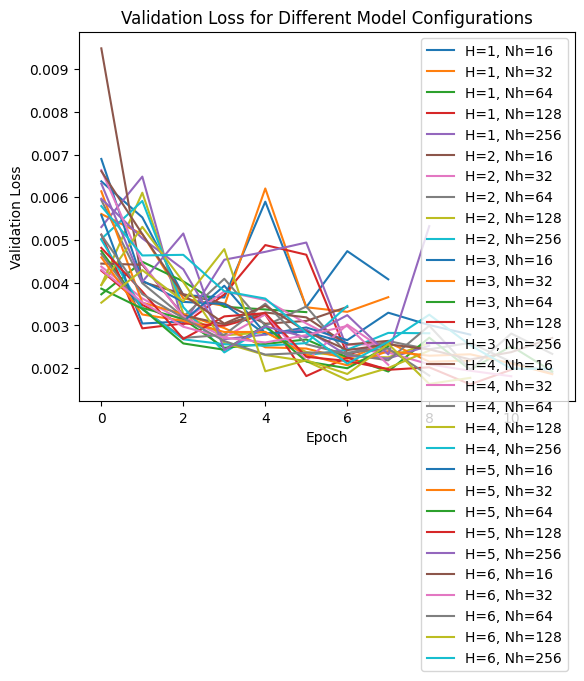

Model with H=1 and Nh=16:
MSE: 0.0036920676939189434
MAE: 0.003692068950636515
RMSE: 0.008354055951293557
R-squared: 0.9746515658515376
MAPE: 31.85965426800914%
Model with H=1 and Nh=32:
MSE: 0.00356782553717494
MAE: 0.003567826792550653
RMSE: 0.009557299680658233
R-squared: 0.9668237889116671
MAPE: 23.84442299397504%
Model with H=1 and Nh=64:
MSE: 0.0036636379081755877
MAE: 0.003663638877413657
RMSE: 0.010142178591783508
R-squared: 0.9626389661980854
MAPE: 26.775747028285213%
Model with H=1 and Nh=128:
MSE: 0.002973984694108367
MAE: 0.002973983566849855
RMSE: 0.007669090713196027
R-squared: 0.9786378909784926
MAPE: 25.319971920760825%
Model with H=1 and Nh=256:
MSE: 0.0029900746885687113
MAE: 0.0029900758371098745
RMSE: 0.007258864148771801
R-squared: 0.9808621249553464
MAPE: 26.042981024587498%
Model with H=2 and Nh=16:
MSE: 0.003973356913775206
MAE: 0.003973359498290788
RMSE: 0.009538680966419213
R-squared: 0.9669529251197599
MAPE: 22.678778304426412%
Model with H=2 and Nh=32:
MSE: 

In [5]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_delta_current_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_delta_current_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_delta_current_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_delta_current_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_delta_current_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_delta_current_1.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_delta_current_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_delta_current_1 = model_delta_current_1.fit(X_train_delta_current_1, y_train_delta_current_1, epochs=100, batch_size=32, validation_data=(X_val_delta_current_1, y_val_delta_current_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_delta_current_1[(H, Nh)] = history_delta_current_1

        # Evaluate the model on the testing set
        predictions_delta_current_1 = model_delta_current_1.predict(X_test_delta_current_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_delta_current_1 = model_delta_current_1.evaluate(X_test_delta_current_1, y_test_delta_current_1)
        mses_delta_current_1[(H, Nh)] = mse_delta_current_1

        # Calculate Mean Absolute Error (MAE)
        mae_delta_current_1 = mean_absolute_error(y_test_delta_current_1, predictions_delta_current_1)
        maes_delta_current_1[(H, Nh)] = mae_delta_current_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_delta_current_1 = np.sqrt(mean_squared_error(y_test_delta_current_1, predictions_delta_current_1))
        rmses_delta_current_1[(H, Nh)] = rmse_delta_current_1

        # Calculate R-squared (R2) Score
        r2_delta_current_1 = r2_score(y_test_delta_current_1, predictions_delta_current_1)
        r2_scores_delta_current_1[(H, Nh)] = r2_delta_current_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_delta_current_1 = np.mean(np.abs((y_test_delta_current_1 - predictions_delta_current_1) / y_test_delta_current_1)) * 100
        mapes_delta_current_1[(H, Nh)] = mape_delta_current_1

# Plot the validation loss for each configuration
for (H, Nh), history_delta_current_1 in histories_delta_current_1.items():
    plt.plot(history_delta_current_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_delta_current_1 in mses_delta_current_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_delta_current_1}')
    print(f'MAE: {maes_delta_current_1[(H, Nh)]}')
    print(f'RMSE: {rmses_delta_current_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_delta_current_1[(H, Nh)]}')
    print(f'MAPE: {mapes_delta_current_1[(H, Nh)]}%')


In [6]:
# Rank combinations based on their MSE values
ranked_combinations_delta_current_1 = sorted(mses_delta_current_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_delta_current_1) in enumerate(ranked_combinations_delta_current_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_delta_current_1}")


Rank 1: Combination H=3, Nh=128 - MSE: 0.0018143858760595322
Rank 2: Combination H=6, Nh=128 - MSE: 0.0019380301237106323
Rank 3: Combination H=5, Nh=32 - MSE: 0.0021061617881059647
Rank 4: Combination H=6, Nh=256 - MSE: 0.0021309051662683487
Rank 5: Combination H=4, Nh=32 - MSE: 0.0022192278411239386
Rank 6: Combination H=3, Nh=64 - MSE: 0.0022341166622936726
Rank 7: Combination H=4, Nh=64 - MSE: 0.002317430917173624
Rank 8: Combination H=2, Nh=256 - MSE: 0.002379886107519269
Rank 9: Combination H=2, Nh=64 - MSE: 0.002380761317908764
Rank 10: Combination H=6, Nh=16 - MSE: 0.0024190007243305445
Rank 11: Combination H=5, Nh=256 - MSE: 0.002455097623169422
Rank 12: Combination H=3, Nh=32 - MSE: 0.00249696196988225
Rank 13: Combination H=5, Nh=64 - MSE: 0.002552067395299673
Rank 14: Combination H=4, Nh=128 - MSE: 0.0025697206147015095
Rank 15: Combination H=6, Nh=64 - MSE: 0.002660435624420643
Rank 16: Combination H=5, Nh=128 - MSE: 0.0026676992420107126
Rank 17: Combination H=3, Nh=256 -

In [7]:
# Specify the combination you want to call
H = 3
Nh = 128

# Retrieve the model for the specified combination
selected_model_delta_current_1 = histories_delta_current_1[(H, Nh)].model
selected_model_delta_current_1.save("model_3_128_delta_current_scaler.h5")
# Use the trained model to make predictions on the testing set
prediction_delta_current_1 = selected_model_delta_current_1.predict(X_test_delta_current_1)
inverse_prediction_delta_current_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_delta_current_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_delta_current_1_1 = selected_model_delta_current_1.evaluate(X_test_delta_current_1, y_test_delta_current_1)
print("Mean Squared Error on Testing Set:", mse_delta_current_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_delta_current_1[:5])

print("Inverse Predictions:")
print(inverse_prediction_delta_current_1[:5])

y_test_print_delta_current_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_delta_current_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_delta_current_1[:5])

285/750 [==========>...................] - ETA: 0s

d:\Software\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 0s 597us/step - loss: 0.0018
Mean Squared Error on Testing Set: 0.0018143858760595322
Predictions:
[[0.0117729 ]
 [0.00047425]
 [0.00807026]
 [0.00984669]
 [0.02322104]]
Inverse Predictions:
[[10.723624 ]
 [ 1.4572904]
 [ 7.686987 ]
 [ 9.143882 ]
 [20.112555 ]]
True Values:
[[10.31313779]
 [ 1.57412647]
 [ 7.26807243]
 [ 7.08448658]
 [15.36642696]]


In [17]:
model_default_delta_current = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_5_64_delta_current_28_4.h5")
model_minmax_delta_current = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_3_128_delta_current_scaler.h5")

prediction_default = model_default_delta_current.predict(X_test_delta_current)
prediction_minmax = model_minmax_delta_current.predict(X_test_delta_current_1)

inverse_prediction_delta_current = scaler_y_new_20_20_20_20.inverse_transform(prediction_minmax)
print("inverse:", inverse_prediction_delta_current)


# Print the first few predictions
print("Predictions:")
print(prediction_default[:5])

print("Inverse Predictions:")
print(inverse_prediction_delta_current[:5])


# Print the corresponding true values
print("True Values:")
print(y_test_delta_current[:5])

# Calculate mean squared error for prediction_default
mse_default_delta_current = mean_squared_error(y_test_delta_current, prediction_default)

# Calculate mean squared error for inverse_prediction
mse_inverse_delta_current = mean_squared_error(y_test_delta_current, inverse_prediction_delta_current)

# Calculate Root Mean Squared Error (RMSE)
rmse_default_delta_current = np.sqrt(mean_squared_error(y_test_delta_current, prediction_default))
rmse_inverse_delta_current = np.sqrt(mean_squared_error(y_test_delta_current, inverse_prediction_delta_current))

# Calculate overall Mean Squared Error (MSE)
overall_mse_default_delta_current = np.mean((y_test_delta_current - prediction_default) ** 2)
overall_mse_inverse_delta_current = np.mean((y_test_delta_current - inverse_prediction_delta_current) ** 2)

print("Overall Mean Squared Error for prediction_default:", overall_mse_default_delta_current)
print("Overall Mean Squared Error for inverse_prediction:", overall_mse_inverse_delta_current)


print("Mean Squared Error for prediction_default:", mse_default_delta_current)
print("Mean Squared Error for inverse_prediction:", mse_inverse_delta_current)

print("Root Mean Squared Error for prediction_default:", rmse_default_delta_current)
print("Root Mean Squared Error for inverse_prediction:", rmse_inverse_delta_current)


750/750 [==============================] - 0s 542us/step
inverse: [[11.270684]
 [ 1.12362 ]
 [ 7.359865]
 ...
 [17.965076]
 [ 6.479322]
 [93.959984]]
Predictions:
[[ 9.729965 ]
 [ 0.       ]
 [ 6.7532277]
 [ 8.451553 ]
 [19.16468  ]]
Inverse Predictions:
[[11.270684]
 [ 1.12362 ]
 [ 7.359865]
 [ 8.544516]
 [20.55741 ]]
True Values:
[[10.31313779]
 [ 1.57412647]
 [ 7.26807243]
 [ 7.08448658]
 [15.36642696]]
Overall Mean Squared Error for prediction_default: 25.51306395713918
Overall Mean Squared Error for inverse_prediction: 38.616987587916064
Mean Squared Error for prediction_default: 25.51306395713918
Mean Squared Error for inverse_prediction: 38.616987587916064
Root Mean Squared Error for prediction_default: 5.051045828057708
Root Mean Squared Error for inverse_prediction: 6.21425680093091


## Current

In [ ]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df_current = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_current = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_current = df_current[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_current = df_current[["current"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled = custom_scaling(X_current)
print(X_scaled[90:])

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_current, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_current = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_current = {}
maes_current = {}
rmses_current = {}
r2_scores_current = {}
mapes_current = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_current = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_current.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_current.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_current.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_current.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_current.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_current.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_current = model_current.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_current[(H, Nh)] = history_current

        # Evaluate the model on the testing set
        predictions_current = model_current.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse_current = model_current.evaluate(X_test, y_test)
        mses_current[(H, Nh)] = mse_current

        # Calculate Mean Absolute Error (MAE)
        mae_current = mean_absolute_error(y_test, predictions_current)
        maes_current[(H, Nh)] = mae_current

        # Calculate Root Mean Squared Error (RMSE)
        rmse_current = np.sqrt(mean_squared_error(y_test, predictions_current))
        rmses_current[(H, Nh)] = rmse_current

        # Calculate R-squared (R2) Score
        r2_current = r2_score(y_test, predictions_current)
        r2_scores_current[(H, Nh)] = r2_current

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_current = np.mean(np.abs((y_test - predictions_current) / y_test)) * 100
        mapes_current[(H, Nh)] = mape_current

# Plot the validation loss for each configuration
for (H, Nh), history_current in histories_current.items():
    plt.plot(history_current.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_current in mses_current.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_current}')
    print(f'MAE: {maes_current[(H, Nh)]}')
    print(f'RMSE: {rmses_current[(H, Nh)]}')
    print(f'R-squared: {r2_scores_current[(H, Nh)]}')
    print(f'MAPE: {mapes_current[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_current = sorted(mses_current.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_current) in enumerate(ranked_combinations_current, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_current}")


In [ ]:
# Specify the combination you want to call
H = 6
Nh = 64

# Retrieve the model for the specified combination
selected_model_current = histories_current[(H, Nh)].model
selected_model_current.save("model_6_64_current_28_4.h5")
# Use the trained model to make predictions on the testing set
prediction_current = selected_model_current.predict(X_test)

# Evaluate the model on the testing set
mse_current_2 = selected_model_current.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse_current_2)

# Print the first few predictions
print("Predictions:")
print(prediction_current[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

## Delta voltage

In [6]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df_delta_voltage = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_delta_voltage = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_delta_voltage = df_delta_voltage[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_delta_voltage = df_delta_voltage[["delta_voltage"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled = custom_scaling(X_delta_voltage)
print(X_scaled[90:])

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_delta_voltage, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_delta_voltage = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_delta_voltage = {}
maes_delta_voltage = {}
rmses_delta_voltage = {}
r2_scores_delta_voltage = {}
mapes_delta_voltage = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

[[0.         0.01020408 0.21052222 0.52676399]
 [0.         0.01020408 0.21052222 0.57907543]
 [0.         0.01020408 0.21052222 0.63138686]
 ...
 [1.         0.18367347 1.         0.89416058]
 [1.         0.18367347 1.         0.94768856]
 [1.         0.18367347 1.         1.        ]]


Epoch 1/100, Loss: 1.2965335845947266, Val Loss: 0.8577417731285095
Epoch 2/100, Loss: 0.8590739965438843, Val Loss: 0.7213141918182373
Epoch 3/100, Loss: 0.7879934906959534, Val Loss: 0.6694284081459045
Epoch 4/100, Loss: 0.7556611895561218, Val Loss: 0.6508030891418457
Epoch 5/100, Loss: 0.753853440284729, Val Loss: 0.6413444876670837
Epoch 6/100, Loss: 0.7464907169342041, Val Loss: 0.6324185729026794
Epoch 7/100, Loss: 0.7415850758552551, Val Loss: 0.6440613865852356
Epoch 8/100, Loss: 0.7362626194953918, Val Loss: 0.6462759375572205
Epoch 9/100, Loss: 0.7336980104446411, Val Loss: 0.6245023012161255
Epoch 10/100, Loss: 0.7220703363418579, Val Loss: 0.6171495914459229
Epoch 11/100, Loss: 0.7082330584526062, Val Loss: 0.6259203553199768
Epoch 12/100, Loss: 0.7082417607307434, Val Loss: 0.6614373922348022
Epoch 13/100, Loss: 0.7068349123001099, Val Loss: 0.5974941253662109
Epoch 14/100, Loss: 0.7058024406433105, Val Loss: 0.5835551619529724
Epoch 15/100, Loss: 0.7056336402893066, Val 

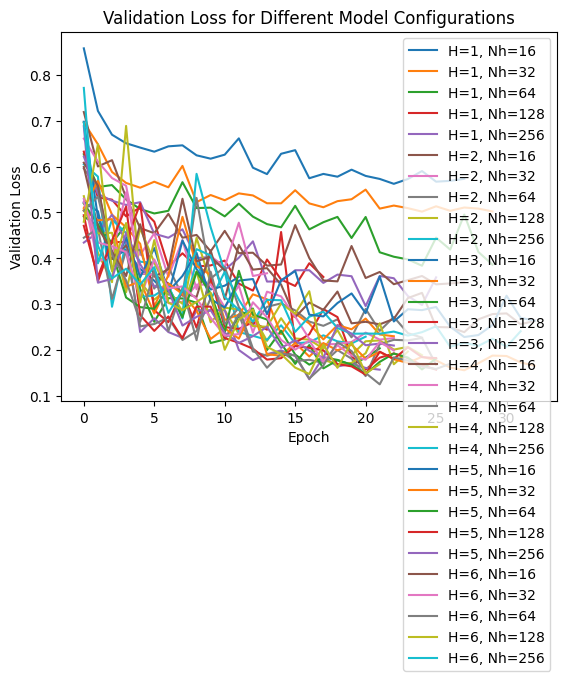

Model with H=1 and Nh=16:
MSE: 0.5602959394454956
MAE: 0.5602960587195457
RMSE: 0.9879442989797128
R-squared: 0.9028929894022225
MAPE: 19.253971071149635%
Model with H=1 and Nh=32:
MSE: 0.4996844530105591
MAE: 0.49968449385056396
RMSE: 0.9414044890458622
R-squared: 0.9118264765667681
MAPE: 16.144524716748542%
Model with H=1 and Nh=64:
MSE: 0.3809216618537903
MAE: 0.3809214922294267
RMSE: 0.6671590580460287
R-squared: 0.9557162449831419
MAPE: 14.18880048265056%
Model with H=1 and Nh=128:
MSE: 0.32730433344841003
MAE: 0.3273045268471167
RMSE: 0.5501603949492483
R-squared: 0.9698862866498884
MAPE: 13.198921568748098%
Model with H=1 and Nh=256:
MSE: 0.29402169585227966
MAE: 0.294021827282448
RMSE: 0.49652779340045916
R-squared: 0.9754713982163571
MAPE: 12.284047507271445%
Model with H=2 and Nh=16:
MSE: 0.3423292338848114
MAE: 0.3423291703826088
RMSE: 0.590585657965387
R-squared: 0.9652982434884505
MAPE: 13.10691392838366%
Model with H=2 and Nh=32:
MSE: 0.32738515734672546
MAE: 0.3273851179

In [7]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_delta_voltage = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_delta_voltage.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_delta_voltage.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_delta_voltage.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_delta_voltage.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_delta_voltage.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_delta_voltage.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_delta_voltage = model_delta_voltage.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_delta_voltage[(H, Nh)] = history_delta_voltage

        # Evaluate the model on the testing set
        predictions_delta_voltage = model_delta_voltage.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse_delta_voltage = model_delta_voltage.evaluate(X_test, y_test)
        mses_delta_voltage[(H, Nh)] = mse_delta_voltage

        # Calculate Mean Absolute Error (MAE)
        mae_delta_voltage = mean_absolute_error(y_test, predictions_delta_voltage)
        maes_delta_voltage[(H, Nh)] = mae_delta_voltage

        # Calculate Root Mean Squared Error (RMSE)
        rmse_delta_voltage = np.sqrt(mean_squared_error(y_test, predictions_delta_voltage))
        rmses_delta_voltage[(H, Nh)] = rmse_delta_voltage

        # Calculate R-squared (R2) Score
        r2_delta_voltage = r2_score(y_test, predictions_delta_voltage)
        r2_scores_delta_voltage[(H, Nh)] = r2_delta_voltage

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_delta_voltage = np.mean(np.abs((y_test - predictions_delta_voltage) / y_test)) * 100
        mapes_delta_voltage[(H, Nh)] = mape_delta_voltage

# Plot the validation loss for each configuration
for (H, Nh), history_delta_voltage in histories_delta_voltage.items():
    plt.plot(history_delta_voltage.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_delta_voltage in mses_delta_voltage.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_delta_voltage}')
    print(f'MAE: {maes_delta_voltage[(H, Nh)]}')
    print(f'RMSE: {rmses_delta_voltage[(H, Nh)]}')
    print(f'R-squared: {r2_scores_delta_voltage[(H, Nh)]}')
    print(f'MAPE: {mapes_delta_voltage[(H, Nh)]}%')


In [8]:
# Rank combinations based on their MSE values
ranked_combinations_delta_voltage = sorted(mses_delta_voltage.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_delta_voltage) in enumerate(ranked_combinations_delta_voltage, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_delta_voltage}")


Rank 1: Combination H=6, Nh=64 - MSE: 0.12415551394224167
Rank 2: Combination H=3, Nh=256 - MSE: 0.1308361440896988
Rank 3: Combination H=4, Nh=64 - MSE: 0.14046227931976318
Rank 4: Combination H=5, Nh=128 - MSE: 0.14110271632671356
Rank 5: Combination H=6, Nh=128 - MSE: 0.14530786871910095
Rank 6: Combination H=5, Nh=64 - MSE: 0.14739017188549042
Rank 7: Combination H=5, Nh=32 - MSE: 0.15438516438007355
Rank 8: Combination H=3, Nh=128 - MSE: 0.157281294465065
Rank 9: Combination H=4, Nh=128 - MSE: 0.16512884199619293
Rank 10: Combination H=3, Nh=64 - MSE: 0.16911490261554718
Rank 11: Combination H=5, Nh=256 - MSE: 0.17435020208358765
Rank 12: Combination H=6, Nh=32 - MSE: 0.17464186251163483
Rank 13: Combination H=2, Nh=128 - MSE: 0.182872012257576
Rank 14: Combination H=4, Nh=256 - MSE: 0.19312730431556702
Rank 15: Combination H=2, Nh=256 - MSE: 0.20656751096248627
Rank 16: Combination H=4, Nh=32 - MSE: 0.20807930827140808
Rank 17: Combination H=3, Nh=32 - MSE: 0.2237592190504074
Ran

In [11]:
# Specify the combination you want to call
H = 6
Nh = 64

# Retrieve the model for the specified combination
selected_model_delta_voltage = histories_delta_voltage[(H, Nh)].model
selected_model_delta_voltage.save("model_6_64_delta_voltagr_28_4.h5")
# Use the trained model to make predictions on the testing set
prediction_delta_voltage = selected_model_delta_voltage.predict(X_test)

# Evaluate the model on the testing set
mse_delta_voltage_2 = selected_model_delta_voltage.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse_delta_voltage_2)

# Print the first few predictions
print("Predictions:")
print(prediction_delta_voltage[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

 78/750 [==>...........................] - ETA: 0s 

d:\Software\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 1s 727us/step - loss: 0.1242
Mean Squared Error on Testing Set: 0.12415551394224167
Predictions:
[[0.4830832 ]
 [0.51144874]
 [0.78585786]
 [2.7543457 ]
 [7.720581  ]]
True Values:
[[0.41399215]
 [0.5888331 ]
 [0.74982503]
 [2.85925887]
 [7.91764236]]


## Delta voltage scaler

In [12]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
# df_delta_voltage_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_delta_voltage_1 = pd.read_csv(r"D:\Krishna\ai-power-converter-1\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_delta_voltage_1 = df_delta_voltage_1[['L', 'C', 'fsw', "t_dt"]].values
# print(X_delta_voltage_1[-10:])

# Extract output (ripples)
y_delta_voltage_1 = df_delta_voltage_1[["delta_voltage"]].values  # Adjust column names as per your dataset

scaler_y_new_20_20_20_20 = MinMaxScaler(feature_range=(0, 1))


# Fit the scaler to your target variable and transform it
y_scaled_delta_voltage_1 = scaler_y_new_20_20_20_20.fit_transform(y_delta_voltage_1)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_delta_voltage_1 = custom_scaling_minmax(X_delta_voltage_1)
# print(X_scaled_delta_voltage_1[-10:])

# Split the dataset into training, validation, and testing sets
X_train_delta_voltage_1, X_temp_delta_voltage_1, y_train_delta_voltage_1, y_temp_delta_voltage_1 = train_test_split(X_scaled_delta_voltage_1, y_scaled_delta_voltage_1, test_size=0.3, random_state=42)
X_val_delta_voltage_1, X_test_delta_voltage_1, y_val_delta_voltage_1, y_test_delta_voltage_1 = train_test_split(X_temp_delta_voltage_1, y_temp_delta_voltage_1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_delta_voltage_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_delta_voltage_1 = {}
maes_delta_voltage_1 = {}
rmses_delta_voltage_1 = {}
r2_scores_delta_voltage_1 = {}
mapes_delta_voltage_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

Epoch 1/100, Loss: 0.04823298007249832, Val Loss: 0.021880244836211205
Epoch 2/100, Loss: 0.02274187281727791, Val Loss: 0.022170353680849075
Epoch 3/100, Loss: 0.022574277594685555, Val Loss: 0.022562596946954727
Epoch 4/100, Loss: 0.022170402109622955, Val Loss: 0.020439743995666504
Epoch 5/100, Loss: 0.021871346980333328, Val Loss: 0.020202413201332092
Epoch 6/100, Loss: 0.0217120461165905, Val Loss: 0.021823765709996223
Epoch 7/100, Loss: 0.02150118537247181, Val Loss: 0.0200368482619524
Epoch 8/100, Loss: 0.021399373188614845, Val Loss: 0.01992201805114746
Epoch 9/100, Loss: 0.021353082731366158, Val Loss: 0.019729338586330414
Restoring model weights from the end of the best epoch: 4.
Epoch 9: early stopping
750/750 [==============================] - 0s 473us/step - loss: 0.0200
Epoch 1/100, Loss: 0.03854452818632126, Val Loss: 0.015997471287846565
Epoch 2/100, Loss: 0.01671982929110527, Val Loss: 0.015412756241858006
Epoch 3/100, Loss: 0.016175691038370132, Val Loss: 0.0137807019

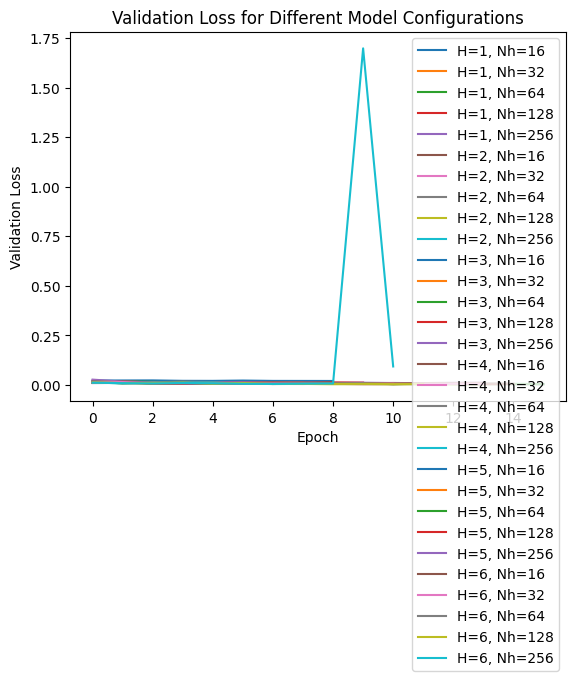

Model with H=1 and Nh=16:
MSE: 0.020037170499563217
MAE: 0.02003717189291474
RMSE: 0.04763585666969471
R-squared: 0.3547857403550515
MAPE: 62.24752723870737%
Model with H=1 and Nh=32:
MSE: 0.013858994469046593
MAE: 0.013858999528999641
RMSE: 0.022802385647539947
R-squared: 0.8521584285313153
MAPE: 52.286914825541345%
Model with H=1 and Nh=64:
MSE: 0.012664621695876122
MAE: 0.012664627149035046
RMSE: 0.020330944925100704
R-squared: 0.8824693534979376
MAPE: 47.74064446469041%
Model with H=1 and Nh=128:
MSE: 0.011403598822653294
MAE: 0.011403595475523044
RMSE: 0.019286916960758554
R-squared: 0.8942302157227207
MAPE: 36.452833605116666%
Model with H=1 and Nh=256:
MSE: 0.009782075881958008
MAE: 0.009782072515786142
RMSE: 0.014661365374867586
R-squared: 0.9388797909329033
MAPE: 37.01620362545682%
Model with H=2 and Nh=16:
MSE: 0.005960372276604176
MAE: 0.005960367252249157
RMSE: 0.008889552840012416
R-squared: 0.9775303747748947
MAPE: 26.45242585829635%
Model with H=2 and Nh=32:
MSE: 0.00660

In [13]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_delta_voltage_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_delta_voltage_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_delta_voltage_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_delta_voltage_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_delta_voltage_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_delta_voltage_1.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_delta_voltage_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_delta_voltage_1 = model_delta_voltage_1.fit(X_train_delta_voltage_1, y_train_delta_voltage_1, epochs=100, batch_size=32, validation_data=(X_val_delta_voltage_1, y_val_delta_voltage_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_delta_voltage_1[(H, Nh)] = history_delta_voltage_1

        # Evaluate the model on the testing set
        predictions_delta_voltage_1 = model_delta_voltage_1.predict(X_test_delta_voltage_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_delta_voltage_1 = model_delta_voltage_1.evaluate(X_test_delta_voltage_1, y_test_delta_voltage_1)
        mses_delta_voltage_1[(H, Nh)] = mse_delta_voltage_1

        # Calculate Mean Absolute Error (MAE)
        mae_delta_voltage_1 = mean_absolute_error(y_test_delta_voltage_1, predictions_delta_voltage_1)
        maes_delta_voltage_1[(H, Nh)] = mae_delta_voltage_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_delta_voltage_1 = np.sqrt(mean_squared_error(y_test_delta_voltage_1, predictions_delta_voltage_1))
        rmses_delta_voltage_1[(H, Nh)] = rmse_delta_voltage_1

        # Calculate R-squared (R2) Score
        r2_delta_voltage_1 = r2_score(y_test_delta_voltage_1, predictions_delta_voltage_1)
        r2_scores_delta_voltage_1[(H, Nh)] = r2_delta_voltage_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_delta_voltage_1 = np.mean(np.abs((y_test_delta_voltage_1 - predictions_delta_voltage_1) / y_test_delta_voltage_1)) * 100
        mapes_delta_voltage_1[(H, Nh)] = mape_delta_voltage_1

# Plot the validation loss for each configuration
for (H, Nh), history_delta_voltage_1 in histories_delta_voltage_1.items():
    plt.plot(history_delta_voltage_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_delta_voltage_1 in mses_delta_voltage_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_delta_voltage_1}')
    print(f'MAE: {maes_delta_voltage_1[(H, Nh)]}')
    print(f'RMSE: {rmses_delta_voltage_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_delta_voltage_1[(H, Nh)]}')
    print(f'MAPE: {mapes_delta_voltage_1[(H, Nh)]}%')


In [14]:
# Rank combinations based on their MSE values
ranked_combinations_delta_voltage_1 = sorted(mses_delta_voltage_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_delta_voltage_1) in enumerate(ranked_combinations_delta_voltage_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_delta_voltage_1}")


Rank 1: Combination H=4, Nh=128 - MSE: 0.003328313585370779
Rank 2: Combination H=4, Nh=64 - MSE: 0.003748873947188258
Rank 3: Combination H=5, Nh=128 - MSE: 0.0038509683217853308
Rank 4: Combination H=5, Nh=64 - MSE: 0.0041879951022565365
Rank 5: Combination H=6, Nh=128 - MSE: 0.004483150318264961
Rank 6: Combination H=2, Nh=256 - MSE: 0.004486071411520243
Rank 7: Combination H=3, Nh=128 - MSE: 0.004508268088102341
Rank 8: Combination H=3, Nh=64 - MSE: 0.004509400576353073
Rank 9: Combination H=2, Nh=128 - MSE: 0.004762757103890181
Rank 10: Combination H=3, Nh=256 - MSE: 0.004824744071811438
Rank 11: Combination H=4, Nh=256 - MSE: 0.004864383488893509
Rank 12: Combination H=6, Nh=64 - MSE: 0.004896699916571379
Rank 13: Combination H=6, Nh=32 - MSE: 0.005303750280290842
Rank 14: Combination H=5, Nh=32 - MSE: 0.005408450961112976
Rank 15: Combination H=6, Nh=256 - MSE: 0.005420284811407328
Rank 16: Combination H=6, Nh=16 - MSE: 0.005690713878720999
Rank 17: Combination H=2, Nh=16 - MSE:

In [18]:
# Specify the combination you want to call
H = 4
Nh = 128

# Retrieve the model for the specified combination
selected_model_delta_voltage_1 = histories_delta_voltage_1[(H, Nh)].model
selected_model_delta_voltage_1.save("model_4_128_delta_voltage_scaler.h5")
# Use the trained model to make predictions on the testing set
prediction_delta_voltage_1 = selected_model_delta_voltage_1.predict(X_test_delta_voltage_1)
inverse_prediction_delta_voltage_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_delta_voltage_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_delta_voltage_1_1 = selected_model_delta_voltage_1.evaluate(X_test_delta_voltage_1, y_test_delta_voltage_1)
print("Mean Squared Error on Testing Set:", mse_delta_voltage_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_delta_voltage_1[:5])

print("Inverse Predictions:")
print(inverse_prediction_delta_voltage_1[:5])

y_test_print_delta_voltage_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_delta_voltage_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_delta_voltage_1[:5])

171/750 [=====>........................] - ETA: 0s

d:\Software\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 0s 597us/step - loss: 0.0033
Mean Squared Error on Testing Set: 0.003328313585370779
Predictions:
[[0.00387779]
 [0.00167281]
 [0.00596222]
 [0.04713038]
 [0.15066294]]
Inverse Predictions:
[[0.4355257]
 [0.3176485]
 [0.5469584]
 [2.747789 ]
 [8.282592 ]]
True Values:
[[0.41399215]
 [0.5888331 ]
 [0.74982503]
 [2.85925887]
 [7.91764236]]


In [22]:
model_default_delta_voltage = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_6_64_delta_voltagr_28_4.h5")
model_minmax_delta_voltage = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_4_128_delta_voltage_scaler.h5")

prediction_default = model_default_delta_voltage.predict(X_test_delta_voltage_1)
prediction_minmax = model_minmax_delta_voltage.predict(X_test_delta_voltage_1)

inverse_prediction_delta_voltage = scaler_y_new_20_20_20_20.inverse_transform(prediction_minmax)
print("inverse:", inverse_prediction_delta_voltage)


# Print the first few predictions
print("Predictions:")
print(prediction_default[:10])

print("Inverse Predictions:")
print(inverse_prediction_delta_voltage[:10])


# Print the corresponding true values
print("True Values:")
print(y_test[:10])

# Calculate mean squared error for prediction_default
mse_default_delta_voltage = mean_squared_error(y_test, prediction_default)

# Calculate mean squared error for inverse_prediction
mse_inverse_delta_voltage = mean_squared_error(y_test, inverse_prediction_delta_voltage)

print("Mean Squared Error for prediction_default:", mse_default_delta_voltage)
print("Mean Squared Error for inverse_prediction:", mse_inverse_delta_voltage)

750/750 [==============================] - 0s 556us/step
inverse: [[ 0.4355257]
 [ 0.3176485]
 [ 0.5469584]
 ...
 [ 6.636471 ]
 [ 7.400544 ]
 [11.152888 ]]
Predictions:
[[0.4830832 ]
 [0.51144874]
 [0.78585786]
 [2.7543457 ]
 [7.720581  ]
 [1.337369  ]
 [5.4996047 ]
 [2.2056222 ]
 [0.41481784]
 [2.3347206 ]]
Inverse Predictions:
[[0.4355257]
 [0.3176485]
 [0.5469584]
 [2.747789 ]
 [8.282592 ]
 [1.303642 ]
 [5.4657617]
 [2.1525156]
 [0.3377276]
 [2.4339216]]
True Values:
[[0.41399215]
 [0.5888331 ]
 [0.74982503]
 [2.85925887]
 [7.91764236]
 [1.27199646]
 [5.52868879]
 [1.96029281]
 [0.40392649]
 [2.29789381]]
Mean Squared Error for prediction_default: 0.06630954188135611
Mean Squared Error for inverse_prediction: 0.09054501615642456


## Voltage

In [ ]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df_voltage = pd.read_csv(r"E:\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_voltage = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_voltage = df_voltage[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_voltage = df_voltage[["voltage"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled = custom_scaling(X_voltage)
print(X_scaled[90:])

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_voltage, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_voltage = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_voltage = {}
maes_voltage = {}
rmses_voltage = {}
r2_scores_voltage = {}
mapes_voltage = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_voltage = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_voltage.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_voltage.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_voltage.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_voltage.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_voltage.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_voltage.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_voltage = model_voltage.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_voltage[(H, Nh)] = history_voltage

        # Evaluate the model on the testing set
        predictions_voltage = model_voltage.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse_voltage = model_voltage.evaluate(X_test, y_test)
        mses_voltage[(H, Nh)] = mse_voltage

        # Calculate Mean Absolute Error (MAE)
        mae_voltage = mean_absolute_error(y_test, predictions_voltage)
        maes_voltage[(H, Nh)] = mae_voltage

        # Calculate Root Mean Squared Error (RMSE)
        rmse_voltage = np.sqrt(mean_squared_error(y_test, predictions_voltage))
        rmses_voltage[(H, Nh)] = rmse_voltage

        # Calculate R-squared (R2) Score
        r2_voltage = r2_score(y_test, predictions_voltage)
        r2_scores_voltage[(H, Nh)] = r2_voltage

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_voltage = np.mean(np.abs((y_test - predictions_voltage) / y_test)) * 100
        mapes_voltage[(H, Nh)] = mape_voltage

# Plot the validation loss for each configuration
for (H, Nh), history_voltage in histories_voltage.items():
    plt.plot(history_voltage.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_voltage in mses_voltage.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_voltage}')
    print(f'MAE: {maes_voltage[(H, Nh)]}')
    print(f'RMSE: {rmses_voltage[(H, Nh)]}')
    print(f'R-squared: {r2_scores_voltage[(H, Nh)]}')
    print(f'MAPE: {mapes_voltage[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_voltage = sorted(mses_voltage.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_voltage) in enumerate(ranked_combinations_voltage, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_voltage}")


In [ ]:
# Specify the combination you want to call
H = 6
Nh = 64

# Retrieve the model for the specified combination
selected_model_voltage = histories_voltage[(H, Nh)].model
selected_model_voltage.save("model_6_64_voltage_28_4.h5")
# Use the trained model to make predictions on the testing set
prediction_voltage = selected_model_voltage.predict(X_test)

# Evaluate the model on the testing set
mse_voltage_2 = selected_model_voltage.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse_voltage_2)

# Print the first few predictions
print("Predictions:")
print(prediction_voltage[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

## Voltage scaler

In [ ]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
# df_voltage_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_voltage_1 = pd.read_csv(r"D:\Krishna\ai-power-converter-1\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_voltage_1 = df_voltage_1[['L', 'C', 'fsw', "t_dt"]].values
# print(X_voltage_1[-10:])

# Extract output (ripples)
y_voltage_1 = df_voltage_1[["voltage"]].values  # Adjust column names as per your dataset

scaler_voltage = MinMaxScaler(feature_range=(0, 1))


# Fit the scaler to your target variable and transform it
y_scaled_voltage_1 = scaler_voltage.fit_transform(y_voltage_1)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_voltage_1 = custom_scaling_minmax(X_voltage_1)
# print(X_scaled_voltage_1[-10:])

# Split the dataset into training, validation, and testing sets
X_train_voltage_1, X_temp_voltage_1, y_train_voltage_1, y_temp_voltage_1 = train_test_split(X_scaled_voltage_1, y_scaled_voltage_1, test_size=0.3, random_state=42)
X_val_voltage_1, X_test_voltage_1, y_val_voltage_1, y_test_voltage_1 = train_test_split(X_temp_voltage_1, y_temp_voltage_1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_voltage_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_voltage_1 = {}
maes_voltage_1 = {}
rmses_voltage_1 = {}
r2_scores_voltage_1 = {}
mapes_voltage_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_voltage_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_voltage_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_voltage_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_voltage_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_voltage_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_voltage_1.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_voltage_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_voltage_1 = model_voltage_1.fit(X_train_voltage_1, y_train_voltage_1, epochs=100, batch_size=32, validation_data=(X_val_voltage_1, y_val_voltage_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_voltage_1[(H, Nh)] = history_voltage_1

        # Evaluate the model on the testing set
        predictions_voltage_1 = model_voltage_1.predict(X_test_voltage_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_voltage_1 = model_voltage_1.evaluate(X_test_voltage_1, y_test_voltage_1)
        mses_voltage_1[(H, Nh)] = mse_voltage_1

        # Calculate Mean Absolute Error (MAE)
        mae_voltage_1 = mean_absolute_error(y_test_voltage_1, predictions_voltage_1)
        maes_voltage_1[(H, Nh)] = mae_voltage_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_voltage_1 = np.sqrt(mean_squared_error(y_test_voltage_1, predictions_voltage_1))
        rmses_voltage_1[(H, Nh)] = rmse_voltage_1

        # Calculate R-squared (R2) Score
        r2_voltage_1 = r2_score(y_test_voltage_1, predictions_voltage_1)
        r2_scores_voltage_1[(H, Nh)] = r2_voltage_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_voltage_1 = np.mean(np.abs((y_test_voltage_1 - predictions_voltage_1) / y_test_voltage_1)) * 100
        mapes_voltage_1[(H, Nh)] = mape_voltage_1

# Plot the validation loss for each configuration
for (H, Nh), history_voltage_1 in histories_voltage_1.items():
    plt.plot(history_voltage_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_voltage_1 in mses_voltage_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_voltage_1}')
    print(f'MAE: {maes_voltage_1[(H, Nh)]}')
    print(f'RMSE: {rmses_voltage_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_voltage_1[(H, Nh)]}')
    print(f'MAPE: {mapes_voltage_1[(H, Nh)]}%')


In [ ]:
# Rank combinations based on their MSE values
ranked_combinations_voltage_1 = sorted(mses_voltage_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_voltage_1) in enumerate(ranked_combinations_voltage_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_voltage_1}")


In [ ]:
# Specify the combination you want to call
H = 4
Nh = 128

# Retrieve the model for the specified combination
selected_model_voltage_1 = histories_voltage_1[(H, Nh)].model
selected_model_voltage_1.save("model_4_128_delta_voltage_scaler.h5")
# Use the trained model to make predictions on the testing set
prediction_voltage_1 = selected_model_voltage_1.predict(X_test_voltage_1)
inverse_prediction_voltage_1 = scaler_voltage.inverse_transform(prediction_voltage_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_voltage_1_1 = selected_model_voltage_1.evaluate(X_test_voltage_1, y_test_voltage_1)
print("Mean Squared Error on Testing Set:", mse_voltage_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_voltage_1[:5])

print("Inverse Predictions:")
print(inverse_prediction_voltage_1[:5])

y_test_print_voltage_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_voltage_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_voltage_1[:5])

In [ ]:
model_default_delta_voltage = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_6_64_delta_voltagr_28_4.h5")
model_minmax_delta_voltage = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_4_128_delta_voltage_scaler.h5")

prediction_default = model_default_delta_voltage.predict(X_test_voltage_1)
prediction_minmax = model_minmax_delta_voltage.predict(X_test_voltage_1)

inverse_prediction_delta_voltage = scaler_voltage.inverse_transform(prediction_minmax)
print("inverse:", inverse_prediction_delta_voltage)


# Print the first few predictions
print("Predictions:")
print(prediction_default[:10])

print("Inverse Predictions:")
print(inverse_prediction_delta_voltage[:10])


# Print the corresponding true values
print("True Values:")
print(y_test[:10])

# Calculate mean squared error for prediction_default
mse_default_delta_voltage = mean_squared_error(y_test, prediction_default)

# Calculate mean squared error for inverse_prediction
mse_inverse_delta_voltage = mean_squared_error(y_test, inverse_prediction_delta_voltage)

print("Mean Squared Error for prediction_default:", mse_default_delta_voltage)
print("Mean Squared Error for inverse_prediction:", mse_inverse_delta_voltage)

## Pl_s1, Pl_s2

In [23]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_33x13x13x13.csv")
df_Pl_s1 = pd.read_csv(r"D:\Krishna\ai-power-converter-1\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_Pl_s1 = df_Pl_s1[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_Pl_s1 = df_Pl_s1[["Pl_s1", "Pl_s2"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_Pl_s1 = custom_scaling(X_Pl_s1)
print(X_scaled_Pl_s1[90:])

# Split the dataset into training, validation, and testing sets
X_train_Pl_s1, X_temp_Pl_s1, y_train_Pl_s1, y_temp_Pl_s1 = train_test_split(X_scaled, y_Pl_s1, test_size=0.3, random_state=42)
X_val_Pl_s1, X_test_Pl_s1, y_val_Pl_s1, y_test_Pl_s1 = train_test_split(X_temp_Pl_s1, y_temp_Pl_s1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_Pl_s1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_Pl_s1 = {}
maes_Pl_s1 = {}
rmses_Pl_s1 = {}
r2_scores_Pl_s1 = {}
mapes_Pl_s1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

[[0.         0.01020408 0.21052222 0.52676399]
 [0.         0.01020408 0.21052222 0.57907543]
 [0.         0.01020408 0.21052222 0.63138686]
 ...
 [1.         0.18367347 1.         0.89416058]
 [1.         0.18367347 1.         0.94768856]
 [1.         0.18367347 1.         1.        ]]


Epoch 1/100, Loss: 0.14067551493644714, Val Loss: 0.060600411146879196
Epoch 2/100, Loss: 0.08886624872684479, Val Loss: 0.0599813349545002
Epoch 3/100, Loss: 0.0866183266043663, Val Loss: 0.056325916200876236
Epoch 4/100, Loss: 0.08503630757331848, Val Loss: 0.057192739099264145
Epoch 5/100, Loss: 0.08518804609775543, Val Loss: 0.06362593919038773
Epoch 6/100, Loss: 0.08387447893619537, Val Loss: 0.06415873020887375
Epoch 7/100, Loss: 0.08226894587278366, Val Loss: 0.0841989740729332
Epoch 8/100, Loss: 0.08178690075874329, Val Loss: 0.05731199309229851
Restoring model weights from the end of the best epoch: 3.
Epoch 8: early stopping
750/750 [==============================] - 0s 480us/step - loss: 0.0556
Epoch 1/100, Loss: 0.12745538353919983, Val Loss: 0.06474043428897858
Epoch 2/100, Loss: 0.08081945776939392, Val Loss: 0.04748839884996414
Epoch 3/100, Loss: 0.0790514126420021, Val Loss: 0.05164959281682968
Epoch 4/100, Loss: 0.0779561996459961, Val Loss: 0.04495720937848091
Epoch 5

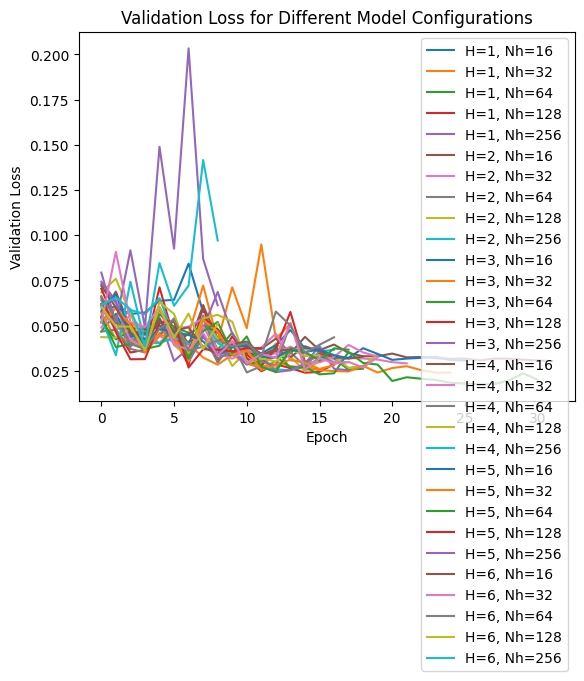

Model with H=1 and Nh=16:
MSE: 0.05556105077266693
MAE: 0.055561038537509905
RMSE: 0.0770586119291283
R-squared: 0.964113952918131
MAPE: 3.154870075099207%
Model with H=1 and Nh=32:
MSE: 0.04120149835944176
MAE: 0.041201488355208093
RMSE: 0.061931055034685906
R-squared: 0.9768207053459463
MAPE: 2.178769118852504%
Model with H=1 and Nh=64:
MSE: 0.025523187592625618
MAE: 0.0255232054010214
RMSE: 0.04038970268797805
R-squared: 0.9901411883015346
MAPE: 1.3277289230182945%
Model with H=1 and Nh=128:
MSE: 0.02447437308728695
MAE: 0.024474367898398977
RMSE: 0.03769818935498606
R-squared: 0.9914113631069182
MAPE: 1.27772104649762%
Model with H=1 and Nh=256:
MSE: 0.030179323628544807
MAE: 0.03017932367103736
RMSE: 0.04507458011782354
R-squared: 0.9877214625602075
MAPE: 1.5643430814460444%
Model with H=2 and Nh=16:
MSE: 0.03075743280351162
MAE: 0.03075742994219391
RMSE: 0.04750381939102333
R-squared: 0.9863623256047134
MAPE: 1.6032771257098117%
Model with H=2 and Nh=32:
MSE: 0.029764270409941673

In [24]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_Pl_s1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_Pl_s1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_Pl_s1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_Pl_s1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_Pl_s1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_Pl_s1.add(tf.keras.layers.Dense(2, activation='softplus'))  

        # Compile the model
        model_Pl_s1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_Pl_s1 = model_Pl_s1.fit(X_train_Pl_s1, y_train_Pl_s1, epochs=100, batch_size=32, validation_data=(X_val_Pl_s1, y_val_Pl_s1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_Pl_s1[(H, Nh)] = history_Pl_s1

        # Evaluate the model on the testing set
        predictions_Pl_s1 = model_Pl_s1.predict(X_test_Pl_s1)

        # Evaluate the model on the testing set and calculate MSE
        mse_Pl_s1 = model_Pl_s1.evaluate(X_test_Pl_s1, y_test_Pl_s1)
        mses_Pl_s1[(H, Nh)] = mse_Pl_s1

        # Calculate Mean Absolute Error (MAE)
        mae_Pl_s1 = mean_absolute_error(y_test_Pl_s1, predictions_Pl_s1)
        maes_Pl_s1[(H, Nh)] = mae_Pl_s1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_Pl_s1 = np.sqrt(mean_squared_error(y_test_Pl_s1, predictions_Pl_s1))
        rmses_Pl_s1[(H, Nh)] = rmse_Pl_s1

        # Calculate R-squared (R2) Score
        r2_Pl_s1 = r2_score(y_test_Pl_s1, predictions_Pl_s1)
        r2_scores_Pl_s1[(H, Nh)] = r2_Pl_s1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_Pl_s1 = np.mean(np.abs((y_test_Pl_s1 - predictions_Pl_s1) / y_test_Pl_s1)) * 100
        mapes_Pl_s1[(H, Nh)] = mape_Pl_s1

# Plot the validation loss for each configuration
for (H, Nh), history_Pl_s1 in histories_Pl_s1.items():
    plt.plot(history_Pl_s1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_Pl_s1 in mses_Pl_s1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_Pl_s1}')
    print(f'MAE: {maes_Pl_s1[(H, Nh)]}')
    print(f'RMSE: {rmses_Pl_s1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_Pl_s1[(H, Nh)]}')
    print(f'MAPE: {mapes_Pl_s1[(H, Nh)]}%')


In [25]:
# Rank combinations based on their MSE values
ranked_combinations_Pl_s1 = sorted(mses_Pl_s1.items(), key=lambda x: x[1])
# Print ranked combinations
for idx, ((H, Nh), mse_Pl_s1) in enumerate(ranked_combinations_Pl_s1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_Pl_s1}")


Rank 1: Combination H=3, Nh=64 - MSE: 0.01775272563099861
Rank 2: Combination H=5, Nh=64 - MSE: 0.023187555372714996
Rank 3: Combination H=3, Nh=256 - MSE: 0.023845652118325233
Rank 4: Combination H=2, Nh=64 - MSE: 0.02397524192929268
Rank 5: Combination H=3, Nh=32 - MSE: 0.02403109148144722
Rank 6: Combination H=2, Nh=128 - MSE: 0.024085573852062225
Rank 7: Combination H=1, Nh=128 - MSE: 0.02447437308728695
Rank 8: Combination H=5, Nh=32 - MSE: 0.025130579248070717
Rank 9: Combination H=6, Nh=32 - MSE: 0.02518300898373127
Rank 10: Combination H=1, Nh=64 - MSE: 0.025523187592625618
Rank 11: Combination H=5, Nh=128 - MSE: 0.025951731950044632
Rank 12: Combination H=2, Nh=256 - MSE: 0.026213757693767548
Rank 13: Combination H=4, Nh=64 - MSE: 0.027763374149799347
Rank 14: Combination H=3, Nh=128 - MSE: 0.027835723012685776
Rank 15: Combination H=4, Nh=128 - MSE: 0.028124626725912094
Rank 16: Combination H=4, Nh=32 - MSE: 0.02952934242784977
Rank 17: Combination H=2, Nh=32 - MSE: 0.0297642

In [31]:
# Specify the combination you want to call
H = 3
Nh = 64

# Retrieve the model for the specified combination
selected_model_Pl_s1 = histories_Pl_s1[(H, Nh)].model
selected_model_Pl_s1.save("model_3_64_Pls1_Pls2_28_4.h5")
# Use the trained model to make predictions on the testing set
prediction_Pl_s1 = selected_model_Pl_s1.predict(X_test_Pl_s1)

# Evaluate the model on the testing set
mse_Pl_s1_3 = selected_model_Pl_s1.evaluate(X_test_Pl_s1, y_test_Pl_s1)
print("Mean Squared Error on Testing Set:", mse_Pl_s1_3)

# Print the first few predictions
print("Predictions:")
print(prediction_Pl_s1[:5])

# Print the corresponding true values
print("True Values:")
print(y_test_Pl_s1[:5])

138/750 [====>.........................] - ETA: 0s

d:\Software\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 0s 553us/step - loss: 0.0178
Mean Squared Error on Testing Set: 0.01775272563099861
Predictions:
[[1.7007864 1.695872 ]
 [1.5334228 1.5298066]
 [1.7086029 1.7049094]
 [2.5280745 2.5271459]
 [1.6711886 1.6642991]]
True Values:
[[1.68153236 1.68153236]
 [1.55288744 1.55288744]
 [1.70935463 1.70935463]
 [2.53994796 2.53994796]
 [1.67185702 1.67185702]]


## Pl_s1, Pl_s2 scaler

In [27]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
# df_Pl_s1_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_Pl_s1_1 = pd.read_csv(r"D:\Krishna\ai-power-converter-1\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_Pl_s1_1 = df_Pl_s1_1[['L', 'C', 'fsw', "t_dt"]].values
# print(X_Pl_s1_1[-10:])

# Extract output (ripples)
y_Pl_s1_1 = df_Pl_s1_1[["Pl_s1"]].values  # Adjust column names as per your dataset

scaler_y_new_20_20_20_20 = MinMaxScaler(feature_range=(0, 1))


# Fit the scaler to your target variable and transform it
y_scaled_Pl_s1_1 = scaler_y_new_20_20_20_20.fit_transform(y_Pl_s1_1)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_Pl_s1_1 = custom_scaling_minmax(X_Pl_s1_1)
# print(X_scaled_Pl_s1_1[-10:])

# Split the dataset into training, validation, and testing sets
X_train_Pl_s1_1, X_temp_Pl_s1_1, y_train_Pl_s1_1, y_temp_Pl_s1_1 = train_test_split(X_scaled_Pl_s1_1, y_scaled_Pl_s1_1, test_size=0.3, random_state=42)
X_val_Pl_s1_1, X_test_Pl_s1_1, y_val_Pl_s1_1, y_test_Pl_s1_1 = train_test_split(X_temp_Pl_s1_1, y_temp_Pl_s1_1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_Pl_s1_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_Pl_s1_1 = {}
maes_Pl_s1_1 = {}
rmses_Pl_s1_1 = {}
r2_scores_Pl_s1_1 = {}
mapes_Pl_s1_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_Pl_s1_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_Pl_s1_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_Pl_s1_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_Pl_s1_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_Pl_s1_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_Pl_s1_1.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_Pl_s1_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_Pl_s1_1 = model_Pl_s1_1.fit(X_train_Pl_s1_1, y_train_Pl_s1_1, epochs=100, batch_size=32, validation_data=(X_val_Pl_s1_1, y_val_Pl_s1_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_Pl_s1_1[(H, Nh)] = history_Pl_s1_1

        # Evaluate the model on the testing set
        predictions_Pl_s1_1 = model_Pl_s1_1.predict(X_test_Pl_s1_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_Pl_s1_1 = model_Pl_s1_1.evaluate(X_test_Pl_s1_1, y_test_Pl_s1_1)
        mses_Pl_s1_1[(H, Nh)] = mse_Pl_s1_1

        # Calculate Mean Absolute Error (MAE)
        mae_Pl_s1_1 = mean_absolute_error(y_test_Pl_s1_1, predictions_Pl_s1_1)
        maes_Pl_s1_1[(H, Nh)] = mae_Pl_s1_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_Pl_s1_1 = np.sqrt(mean_squared_error(y_test_Pl_s1_1, predictions_Pl_s1_1))
        rmses_Pl_s1_1[(H, Nh)] = rmse_Pl_s1_1

        # Calculate R-squared (R2) Score
        r2_Pl_s1_1 = r2_score(y_test_Pl_s1_1, predictions_Pl_s1_1)
        r2_scores_Pl_s1_1[(H, Nh)] = r2_Pl_s1_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_Pl_s1_1 = np.mean(np.abs((y_test_Pl_s1_1 - predictions_Pl_s1_1) / y_test_Pl_s1_1)) * 100
        mapes_Pl_s1_1[(H, Nh)] = mape_Pl_s1_1

# Plot the validation loss for each configuration
for (H, Nh), history_Pl_s1_1 in histories_Pl_s1_1.items():
    plt.plot(history_Pl_s1_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_Pl_s1_1 in mses_Pl_s1_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_Pl_s1_1}')
    print(f'MAE: {maes_Pl_s1_1[(H, Nh)]}')
    print(f'RMSE: {rmses_Pl_s1_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_Pl_s1_1[(H, Nh)]}')
    print(f'MAPE: {mapes_Pl_s1_1[(H, Nh)]}%')


In [29]:
# Rank combinations based on their MSE values
ranked_combinations_Pl_s1_1 = sorted(mses_Pl_s1_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_Pl_s1_1) in enumerate(ranked_combinations_Pl_s1_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_Pl_s1_1}")


Rank 1: Combination H=6, Nh=128 - MSE: 0.009118743240833282
Rank 2: Combination H=2, Nh=64 - MSE: 0.009310737252235413
Rank 3: Combination H=2, Nh=256 - MSE: 0.00935949943959713
Rank 4: Combination H=4, Nh=32 - MSE: 0.009506581351161003
Rank 5: Combination H=3, Nh=256 - MSE: 0.0095982002094388
Rank 6: Combination H=5, Nh=64 - MSE: 0.009606320410966873
Rank 7: Combination H=3, Nh=64 - MSE: 0.009733754210174084
Rank 8: Combination H=3, Nh=32 - MSE: 0.009759951382875443
Rank 9: Combination H=2, Nh=128 - MSE: 0.009815536439418793
Rank 10: Combination H=5, Nh=128 - MSE: 0.009941392578184605
Rank 11: Combination H=4, Nh=64 - MSE: 0.01041860319674015
Rank 12: Combination H=3, Nh=128 - MSE: 0.010429690591990948
Rank 13: Combination H=1, Nh=128 - MSE: 0.010491888038814068
Rank 14: Combination H=1, Nh=256 - MSE: 0.012381883338093758
Rank 15: Combination H=6, Nh=64 - MSE: 0.01242582593113184
Rank 16: Combination H=3, Nh=16 - MSE: 0.012557011097669601
Rank 17: Combination H=4, Nh=128 - MSE: 0.0126

In [78]:
# Specify the combination you want to call
H = 6
Nh = 128

# Retrieve the model for the specified combination
selected_model_Pl_s1_1 = histories_Pl_s1_1[(H, Nh)].model
selected_model_Pl_s1_1.save("model_6_128_Pls1_Pls2_scaler.h5")
# Use the trained model to make predictions on the testing set
prediction_Pl_s1_1 = selected_model_Pl_s1_1.predict(X_test_Pl_s1_1)
inverse_prediction_Pl_s1_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_Pl_s1_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_Pl_s1_1_1 = selected_model_Pl_s1_1.evaluate(X_test_Pl_s1_1, y_test_Pl_s1_1)
print("Mean Squared Error on Testing Set:", mse_Pl_s1_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_Pl_s1_1[:5])

print("Inverse Predictions:")
print(inverse_prediction_Pl_s1_1[:5])

y_test_print_Pl_s1_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_Pl_s1_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_Pl_s1_1[:5])

 64/750 [=>............................] - ETA: 0s 

d:\Software\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 1s 712us/step - loss: 0.0091
Mean Squared Error on Testing Set: 0.009118743240833282
Predictions:
[[0.37561506]
 [0.32834226]
 [0.37978566]
 [0.6691462 ]
 [0.36576587]]
Inverse Predictions:
[[0.98871917]
 [0.86654633]
 [0.9994978 ]
 [1.7473272 ]
 [0.9632647 ]]
True Values:
[[0.96630362]
 [0.84689934]
 [0.99212741]
 [1.76305873]
 [0.95732327]]


In [35]:

model_default_Pl_s1_1 = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_3_64_Pls1_Pls2_28_4.h5")
model_minmax_Pl_s1_1 = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_6_128_Pls1_Pls2.h5")

prediction_default = model_default_Pl_s1_1.predict(X_test_Pl_s1_1)
prediction_minmax = model_minmax_Pl_s1_1.predict(X_test_Pl_s1_1)

inverse_prediction_Pl_s1_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_minmax)
print("inverse:", inverse_prediction_Pl_s1_1)


# Print the first few predictions
print("Predictions:")
print(prediction_default[:10])

print("Inverse Predictions:")
print(inverse_prediction_Pl_s1_1[:10])


# Print the corresponding true values
print("True Values:")
print(y_test_Pl_s1[:10])

# Calculate mean squared error for prediction_default
mse_default_Pl_s1_1 = mean_squared_error(y_test_Pl_s1, prediction_default)

# Calculate mean squared error for inverse_prediction
mse_inverse_Pl_s1_1 = mean_squared_error(y_test_Pl_s1_1, inverse_prediction_Pl_s1_1)

print("Mean Squared Error for prediction_default:", mse_default_Pl_s1_1)
print("Mean Squared Error for inverse_prediction:", mse_inverse_Pl_s1_1)


750/750 [==============================] - 1s 727us/step
inverse: [[1.7056826]
 [1.574055 ]
 [1.7172954]
 ...
 [1.8092986]
 [1.8407562]
 [1.4339066]]
Predictions:
[[1.7007864 1.695872 ]
 [1.5334228 1.5298066]
 [1.7086029 1.7049094]
 [2.5280745 2.5271459]
 [1.6711886 1.6642991]
 [1.7589741 1.7566426]
 [1.8643253 1.8586862]
 [2.132544  2.1348743]
 [2.1477242 2.1469986]
 [1.8956571 1.8974214]]
Inverse Predictions:
[[1.7056826]
 [1.574055 ]
 [1.7172954]
 [2.522999 ]
 [1.6782583]
 [1.7367259]
 [1.8689613]
 [2.1441197]
 [2.1216786]
 [1.870538 ]]
True Values:
[[1.68153236 1.68153236]
 [1.55288744 1.55288744]
 [1.70935463 1.70935463]
 [2.53994796 2.53994796]
 [1.67185702 1.67185702]
 [1.75594763 1.75594763]
 [1.87530117 1.87530117]
 [2.17412105 2.17412105]
 [2.13570567 2.13570567]
 [1.68885608 1.68885608]]
Mean Squared Error for prediction_default: 0.0009896531064647665
Mean Squared Error for inverse_prediction: 2.279497469025919


## Pl_C

In [5]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_33x13x13x13.csv")
df_Pl_C = pd.read_csv(r"D:\Krishna\ai-power-converter-1\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_Pl_C = df_Pl_C[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_Pl_C = df_Pl_C[["Pl_C"]].values  # Adjust column names as per your dataset
print("y_pl_c", y_Pl_C[:10])
# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_Pl_C = custom_scaling(X_Pl_C)
print(X_scaled_Pl_C[90:])

# Split the dataset into training, validation, and testing sets
X_train_Pl_C, X_temp_Pl_C, y_train_Pl_C, y_temp_Pl_C = train_test_split(X_scaled_Pl_C, y_Pl_C, test_size=0.3, random_state=42)
X_val_Pl_C, X_test_Pl_C, y_val_Pl_C, y_test_Pl_C = train_test_split(X_temp_Pl_C, y_temp_Pl_C, test_size=0.5, random_state=42)

print("ytest", y_test_Pl_C[:10])
# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_Pl_C = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_Pl_C = {}
maes_Pl_C = {}
rmses_Pl_C = {}
r2_scores_Pl_C = {}
mapes_Pl_C = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

y_pl_c [[1.16526471]
 [1.16383614]
 [1.18828678]
 [1.17007693]
 [1.16414823]
 [1.16317282]
 [1.20446618]
 [1.19108934]
 [1.18452099]
 [1.16850998]]
[[0.         0.01020408 0.21052222 0.52676399]
 [0.         0.01020408 0.21052222 0.57907543]
 [0.         0.01020408 0.21052222 0.63138686]
 ...
 [1.         0.18367347 1.         0.89416058]
 [1.         0.18367347 1.         0.94768856]
 [1.         0.18367347 1.         1.        ]]
ytest [[0.07194298]
 [0.00744112]
 [0.05274349]
 [0.01597721]
 [0.00962383]
 [0.01622776]
 [0.00329136]
 [0.01817286]
 [0.02098441]
 [0.11090105]]


Epoch 1/100, Loss: 0.04082898050546646, Val Loss: 0.006294960621744394
Epoch 2/100, Loss: 0.008590090088546276, Val Loss: 0.005662467796355486
Epoch 3/100, Loss: 0.008320454508066177, Val Loss: 0.0065434398129582405
Epoch 4/100, Loss: 0.00766479829326272, Val Loss: 0.003944803029298782
Epoch 5/100, Loss: 0.0072883195243775845, Val Loss: 0.005715722218155861
Epoch 6/100, Loss: 0.007201008964329958, Val Loss: 0.0038921900559216738
Epoch 7/100, Loss: 0.007128151599317789, Val Loss: 0.0034047176595777273
Epoch 8/100, Loss: 0.0071610757149755955, Val Loss: 0.0037545703817158937
Epoch 9/100, Loss: 0.007137811277061701, Val Loss: 0.003372768172994256
Restoring model weights from the end of the best epoch: 4.
Epoch 9: early stopping
750/750 [==============================] - 1s 877us/step - loss: 0.0040
Epoch 1/100, Loss: 0.02720080502331257, Val Loss: 0.0055564576759934425
Epoch 2/100, Loss: 0.006856173276901245, Val Loss: 0.004036675672978163
Epoch 3/100, Loss: 0.006216852925717831, Val Loss

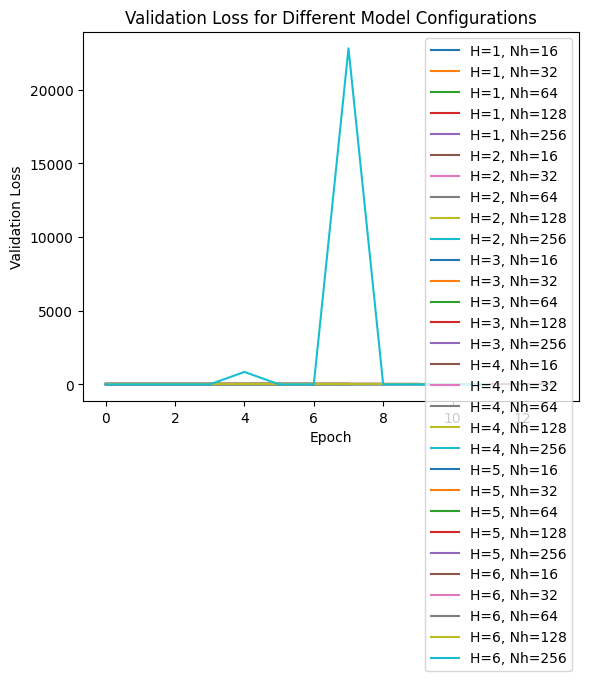

Model with H=1 and Nh=16:
MSE: 0.003952688071876764
MAE: 0.003952686884964249
RMSE: 0.018837761452113362
R-squared: 0.8566050091662156
MAPE: 14.14482935879363%
Model with H=1 and Nh=32:
MSE: 0.0028841521125286818
MAE: 0.002884152778432063
RMSE: 0.00817692057644694
R-squared: 0.9729818907561286
MAPE: 18.012905197866466%
Model with H=1 and Nh=64:
MSE: 0.00351093802601099
MAE: 0.003510936675400925
RMSE: 0.0071123358734341766
R-squared: 0.9795591048885173
MAPE: 16.10087695116449%
Model with H=1 and Nh=128:
MSE: 0.002838494721800089
MAE: 0.002838496051039996
RMSE: 0.008909028830749554
R-squared: 0.9679272555959025
MAPE: 16.533387097905962%
Model with H=1 and Nh=256:
MSE: 0.0030912579968571663
MAE: 0.0030912585871916013
RMSE: 0.00649236274809482
R-squared: 0.9829673999407428
MAPE: 22.01875979742464%
Model with H=2 and Nh=16:
MSE: 0.0030074180103838444
MAE: 0.003007418728551916
RMSE: 0.007403343701709675
R-squared: 0.9778521680971506
MAPE: 14.905321315009376%
Model with H=2 and Nh=32:
MSE: 0.

In [6]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_Pl_C = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_Pl_C.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_Pl_C.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_Pl_C.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_Pl_C.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_Pl_C.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_Pl_C.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_Pl_C = model_Pl_C.fit(X_train_Pl_C, y_train_Pl_C, epochs=100, batch_size=32, validation_data=(X_val_Pl_C, y_val_Pl_C), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_Pl_C[(H, Nh)] = history_Pl_C

        # Evaluate the model on the testing set
        predictions_Pl_C = model_Pl_C.predict(X_test_Pl_C)

        # Evaluate the model on the testing set and calculate MSE
        mse_Pl_C = model_Pl_C.evaluate(X_test_Pl_C, y_test_Pl_C)
        mses_Pl_C[(H, Nh)] = mse_Pl_C

        # Calculate Mean Absolute Error (MAE)
        mae_Pl_C = mean_absolute_error(y_test_Pl_C, predictions_Pl_C)
        maes_Pl_C[(H, Nh)] = mae_Pl_C

        # Calculate Root Mean Squared Error (RMSE)
        rmse_Pl_C = np.sqrt(mean_squared_error(y_test_Pl_C, predictions_Pl_C))
        rmses_Pl_C[(H, Nh)] = rmse_Pl_C

        # Calculate R-squared (R2) Score
        r2_Pl_C = r2_score(y_test_Pl_C, predictions_Pl_C)
        r2_scores_Pl_C[(H, Nh)] = r2_Pl_C

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_Pl_C = np.mean(np.abs((y_test_Pl_C - predictions_Pl_C) / y_test_Pl_C)) * 100
        mapes_Pl_C[(H, Nh)] = mape_Pl_C

# Plot the validation loss for each configuration
for (H, Nh), history_Pl_C in histories_Pl_C.items():
    plt.plot(history_Pl_C.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_Pl_C in mses_Pl_C.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_Pl_C}')
    print(f'MAE: {maes_Pl_C[(H, Nh)]}')
    print(f'RMSE: {rmses_Pl_C[(H, Nh)]}')
    print(f'R-squared: {r2_scores_Pl_C[(H, Nh)]}')
    print(f'MAPE: {mapes_Pl_C[(H, Nh)]}%')


In [61]:
# Rank combinations based on their MSE values
ranked_combinations_Pl_C = sorted(mses_Pl_C.items(), key=lambda x: x[1])
# Print ranked combinations
for idx, ((H, Nh), mse_Pl_C) in enumerate(ranked_combinations_Pl_C, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_Pl_C}")


Rank 1: Combination H=6, Nh=64 - MSE: 0.0017510229954496026
Rank 2: Combination H=6, Nh=128 - MSE: 0.0019737675320357084
Rank 3: Combination H=3, Nh=256 - MSE: 0.0021470063365995884
Rank 4: Combination H=3, Nh=32 - MSE: 0.002194527070969343
Rank 5: Combination H=4, Nh=256 - MSE: 0.0023429051507264376
Rank 6: Combination H=2, Nh=32 - MSE: 0.002388352295383811
Rank 7: Combination H=5, Nh=64 - MSE: 0.0024675282184034586
Rank 8: Combination H=4, Nh=32 - MSE: 0.0024721925146877766
Rank 9: Combination H=4, Nh=128 - MSE: 0.0024958064313977957
Rank 10: Combination H=1, Nh=64 - MSE: 0.0025182501412928104
Rank 11: Combination H=5, Nh=128 - MSE: 0.002594125224277377
Rank 12: Combination H=1, Nh=256 - MSE: 0.0026106766890734434
Rank 13: Combination H=2, Nh=256 - MSE: 0.0026258141733705997
Rank 14: Combination H=5, Nh=16 - MSE: 0.0026685958728194237
Rank 15: Combination H=6, Nh=256 - MSE: 0.002677857642993331
Rank 16: Combination H=5, Nh=32 - MSE: 0.002736880211159587
Rank 17: Combination H=4, Nh=6

In [62]:
# Specify the combination you want to call
H = 6
Nh = 64

# Retrieve the model for the specified combination
selected_model_Pl_C = histories_Pl_C[(H, Nh)].model
selected_model_Pl_C.save("model_6_64_Pl_C_28_4.h5")
# Use the trained model to make predictions on the testing set
prediction_Pl_C = selected_model_Pl_C.predict(X_test_Pl_C)

# Evaluate the model on the testing set
mse_Pl_C_3 = selected_model_Pl_C.evaluate(X_test_Pl_C, y_test_Pl_C)
print("Mean Squared Error on Testing Set:", mse_Pl_C_3)

# Print the first few predictions
print("Predictions:")
print(prediction_Pl_C[:5])

# Print the corresponding true values
print("True Values:")
print(y_test_Pl_C[:5])

170/750 [=====>........................] - ETA: 0s

d:\Software\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 0s 608us/step - loss: 0.0018
Mean Squared Error on Testing Set: 0.0017510229954496026
Predictions:
[[0.06957413]
 [0.00684375]
 [0.04990371]
 [0.01508391]
 [0.01056957]]
True Values:
[[0.07194298]
 [0.00744112]
 [0.05274349]
 [0.01597721]
 [0.00962383]]


## Pl_C scaler

In [70]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
# df_Pl_C_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_Pl_C_1 = pd.read_csv(r"D:\Krishna\ai-power-converter-1\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_Pl_C_1 = df_Pl_C_1[['L', 'C', 'fsw', "t_dt"]].values
# print(X_Pl_C_1[-10:])

# Extract output (ripples)
y_Pl_C_1 = df_Pl_C_1[["Pl_C"]].values  # Adjust column names as per your dataset
print("y_pl_c", y_Pl_C_1[:10])
scaler_y_new_20_20_20_20 = MinMaxScaler(feature_range=(0, 1))


# Fit the scaler to your target variable and transform it
y_scaled_Pl_C_1 = scaler_y_new_20_20_20_20.fit_transform(y_Pl_C_1)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_Pl_C_1 = custom_scaling_minmax(X_Pl_C_1)
# print(X_scaled_Pl_C_1[-10:])

# Split the dataset into training, validation, and testing sets
X_train_Pl_C_1, X_temp_Pl_C_1, y_train_Pl_C_1, y_temp_Pl_C_1 = train_test_split(X_scaled_Pl_C_1, y_scaled_Pl_C_1, test_size=0.3, random_state=42)
X_val_Pl_C_1, X_test_Pl_C_1, y_val_Pl_C_1, y_test_Pl_C_1 = train_test_split(X_temp_Pl_C_1, y_temp_Pl_C_1, test_size=0.5, random_state=42)

print("ytest", y_test_Pl_C_1[:10])

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_Pl_C_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_Pl_C_1 = {}
maes_Pl_C_1 = {}
rmses_Pl_C_1 = {}
r2_scores_Pl_C_1 = {}
mapes_Pl_C_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

y_pl_c [[1.16526471]
 [1.16383614]
 [1.18828678]
 [1.17007693]
 [1.16414823]
 [1.16317282]
 [1.20446618]
 [1.19108934]
 [1.18452099]
 [1.16850998]]
ytest [[0.05808954]
 [0.00585383]
 [0.04254116]
 [0.01276663]
 [0.00762146]
 [0.01296954]
 [0.00249323]
 [0.01454475]
 [0.01682163]
 [0.08963904]]


In [ ]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_Pl_C_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_Pl_C_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_Pl_C_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_Pl_C_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_Pl_C_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_Pl_C_1.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_Pl_C_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_Pl_C_1 = model_Pl_C_1.fit(X_train_Pl_C_1, y_train_Pl_C_1, epochs=100, batch_size=32, validation_data=(X_val_Pl_C_1, y_val_Pl_C_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_Pl_C_1[(H, Nh)] = history_Pl_C_1

        # Evaluate the model on the testing set
        predictions_Pl_C_1 = model_Pl_C_1.predict(X_test_Pl_C_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_Pl_C_1 = model_Pl_C_1.evaluate(X_test_Pl_C_1, y_test_Pl_C_1)
        mses_Pl_C_1[(H, Nh)] = mse_Pl_C_1

        # Calculate Mean Absolute Error (MAE)
        mae_Pl_C_1 = mean_absolute_error(y_test_Pl_C_1, predictions_Pl_C_1)
        maes_Pl_C_1[(H, Nh)] = mae_Pl_C_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_Pl_C_1 = np.sqrt(mean_squared_error(y_test_Pl_C_1, predictions_Pl_C_1))
        rmses_Pl_C_1[(H, Nh)] = rmse_Pl_C_1

        # Calculate R-squared (R2) Score
        r2_Pl_C_1 = r2_score(y_test_Pl_C_1, predictions_Pl_C_1)
        r2_scores_Pl_C_1[(H, Nh)] = r2_Pl_C_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_Pl_C_1 = np.mean(np.abs((y_test_Pl_C_1 - predictions_Pl_C_1) / y_test_Pl_C_1)) * 100
        mapes_Pl_C_1[(H, Nh)] = mape_Pl_C_1

# Plot the validation loss for each configuration
for (H, Nh), history_Pl_C_1 in histories_Pl_C_1.items():
    plt.plot(history_Pl_C_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_Pl_C_1 in mses_Pl_C_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_Pl_C_1}')
    print(f'MAE: {maes_Pl_C_1[(H, Nh)]}')
    print(f'RMSE: {rmses_Pl_C_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_Pl_C_1[(H, Nh)]}')
    print(f'MAPE: {mapes_Pl_C_1[(H, Nh)]}%')


In [72]:
# Rank combinations based on their MSE values
ranked_combinations_Pl_C_1 = sorted(mses_Pl_C_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_Pl_C_1) in enumerate(ranked_combinations_Pl_C_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_Pl_C_1}")


Rank 1: Combination H=3, Nh=32 - MSE: 0.001603869954124093
Rank 2: Combination H=2, Nh=64 - MSE: 0.0017307049129158258
Rank 3: Combination H=3, Nh=256 - MSE: 0.0017767301760613918
Rank 4: Combination H=3, Nh=128 - MSE: 0.0018114886479452252
Rank 5: Combination H=5, Nh=32 - MSE: 0.0018122131004929543
Rank 6: Combination H=1, Nh=64 - MSE: 0.0020029242150485516
Rank 7: Combination H=6, Nh=32 - MSE: 0.0020534389186650515
Rank 8: Combination H=4, Nh=256 - MSE: 0.0021057776175439358
Rank 9: Combination H=5, Nh=16 - MSE: 0.0021193716675043106
Rank 10: Combination H=6, Nh=64 - MSE: 0.00213425001129508
Rank 11: Combination H=2, Nh=256 - MSE: 0.002162420190870762
Rank 12: Combination H=1, Nh=128 - MSE: 0.002198904985561967
Rank 13: Combination H=6, Nh=16 - MSE: 0.0022147302515804768
Rank 14: Combination H=5, Nh=64 - MSE: 0.0022284099832177162
Rank 15: Combination H=5, Nh=256 - MSE: 0.0022464096546173096
Rank 16: Combination H=2, Nh=128 - MSE: 0.0022918148897588253
Rank 17: Combination H=5, Nh=12

In [79]:
# Specify the combination you want to call
H = 3
Nh = 32

# Retrieve the model for the specified combination
selected_model_Pl_C_1 = histories_Pl_C_1[(H, Nh)].model
selected_model_Pl_C_1.save("model_3_32_Pl_C_scaler.h5")
# Use the trained model to make predictions on the testing set
prediction_Pl_C_1 = selected_model_Pl_C_1.predict(X_test_Pl_C_1)
inverse_prediction_Pl_C_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_Pl_C_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_Pl_C_1_1 = selected_model_Pl_C_1.evaluate(X_test_Pl_C_1, y_test_Pl_C_1)
print("Mean Squared Error on Testing Set:", mse_Pl_C_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_Pl_C_1[:5])

print("Inverse Predictions:")
print(inverse_prediction_Pl_C_1[:5])

y_test_print_Pl_C_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_Pl_C_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_Pl_C_1[:5])

184/750 [======>.......................] - ETA: 0s

d:\Software\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 0s 566us/step - loss: 0.0016
Mean Squared Error on Testing Set: 0.001603869954124093
Predictions:
[[0.06030067]
 [0.00529214]
 [0.03878845]
 [0.01228901]
 [0.00775683]]
Inverse Predictions:
[[0.17381407]
 [0.03164886]
 [0.11821745]
 [0.04973172]
 [0.03801866]]
True Values:
[[0.16809957]
 [0.03310053]
 [0.12791603]
 [0.05096611]
 [0.03766882]]


In [81]:

model_default_Pl_C_1 = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_6_64_Pl_C_28_4.h5")
model_minmax_Pl_C_1 = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_3_32_Pl_C_scaler.h5")

prediction_default = model_default_Pl_C_1.predict(X_test_Pl_C)
prediction_minmax = model_minmax_Pl_C_1.predict(X_test_Pl_C_1)

inverse_prediction_Pl_C_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_minmax)
print("inverse:", inverse_prediction_Pl_C_1)


# Print the first few predictions
print("Predictions:")
print(prediction_default[:10])

print("Inverse Predictions:")
print(inverse_prediction_Pl_C_1[:10])


# Print the corresponding true values
print("True Values:")
print(y_test_Pl_C[:10])

# Calculate mean squared error for prediction_default
mse_default_Pl_C_1 = mean_squared_error(y_test_Pl_C, prediction_default)

# Calculate mean squared error for inverse_prediction
mse_inverse_Pl_C_1 = mean_squared_error(y_test_Pl_C, inverse_prediction_Pl_C_1)

print("Mean Squared Error for prediction_default:", mse_default_Pl_C_1)
print("Mean Squared Error for inverse_prediction:", mse_inverse_Pl_C_1)

y_test_print_Pl_C_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_Pl_C_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_Pl_C_1[:5])


750/750 [==============================] - 0s 531us/step
inverse: [[0.17381407]
 [0.03164886]
 [0.11821745]
 ...
 [0.16471474]
 [0.02538577]
 [0.02161933]]
Predictions:
[[0.06957413]
 [0.00684375]
 [0.04990371]
 [0.01508391]
 [0.01056957]
 [0.01521665]
 [0.0037086 ]
 [0.01747891]
 [0.01941312]
 [0.11902956]]
Inverse Predictions:
[[0.17381407]
 [0.03164886]
 [0.11821745]
 [0.04973172]
 [0.03801866]
 [0.04885427]
 [0.02294378]
 [0.05267305]
 [0.06327578]
 [0.28969967]]
True Values:
[[0.07194298]
 [0.00744112]
 [0.05274349]
 [0.01597721]
 [0.00962383]
 [0.01622776]
 [0.00329136]
 [0.01817286]
 [0.02098441]
 [0.11090105]]
Mean Squared Error for prediction_default: 2.1433449041921352e-05
Mean Squared Error for inverse_prediction: 0.006432965683267872
True Values:
[[0.16809957]
 [0.03310053]
 [0.12791603]
 [0.05096611]
 [0.03766882]]


## Pl_L_Cu

In [73]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_33x13x13x13.csv")
df_Pl_L_Cu = pd.read_csv(r"D:\Krishna\ai-power-converter-1\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_Pl_L_Cu = df_Pl_L_Cu[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_Pl_L_Cu = df_Pl_L_Cu[["Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_Pl_L_Cu = custom_scaling(X_Pl_L_Cu)
print(X_scaled_Pl_L_Cu[90:])

# Split the dataset into training, validation, and testing sets
X_train_Pl_L_Cu, X_temp_Pl_L_Cu, y_train_Pl_L_Cu, y_temp_Pl_L_Cu = train_test_split(X_scaled, y_Pl_L_Cu, test_size=0.3, random_state=42)
X_val_Pl_L_Cu, X_test_Pl_L_Cu, y_val_Pl_L_Cu, y_test_Pl_L_Cu = train_test_split(X_temp_Pl_L_Cu, y_temp_Pl_L_Cu, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_Pl_L_Cu = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_Pl_L_Cu = {}
maes_Pl_L_Cu = {}
rmses_Pl_L_Cu = {}
r2_scores_Pl_L_Cu = {}
mapes_Pl_L_Cu = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

[[0.         0.01020408 0.21052222 0.52676399]
 [0.         0.01020408 0.21052222 0.57907543]
 [0.         0.01020408 0.21052222 0.63138686]
 ...
 [1.         0.18367347 1.         0.89416058]
 [1.         0.18367347 1.         0.94768856]
 [1.         0.18367347 1.         1.        ]]


Epoch 1/100, Loss: 0.1484946459531784, Val Loss: 0.09045034646987915
Epoch 2/100, Loss: 0.12932977080345154, Val Loss: 0.08920300006866455
Epoch 3/100, Loss: 0.12508411705493927, Val Loss: 0.09627950191497803
Epoch 4/100, Loss: 0.12588022649288177, Val Loss: 0.08946898579597473
Epoch 5/100, Loss: 0.12577828764915466, Val Loss: 0.09560246020555496
Epoch 6/100, Loss: 0.12557367980480194, Val Loss: 0.08656832575798035
Epoch 7/100, Loss: 0.12579628825187683, Val Loss: 0.08698377758264542
Epoch 8/100, Loss: 0.12472769618034363, Val Loss: 0.08786889910697937
Epoch 9/100, Loss: 0.12502528727054596, Val Loss: 0.08588320016860962
Epoch 10/100, Loss: 0.12488045543432236, Val Loss: 0.08864310383796692
Epoch 11/100, Loss: 0.12386548519134521, Val Loss: 0.08633654564619064
Restoring model weights from the end of the best epoch: 6.
Epoch 11: early stopping
750/750 [==============================] - 0s 494us/step - loss: 0.0871
Epoch 1/100, Loss: 0.14140798151493073, Val Loss: 0.09130300581455231
Epo

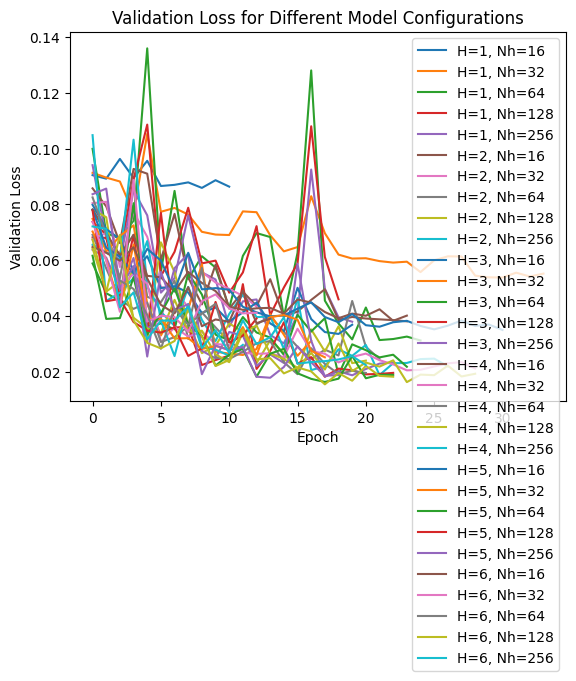

Model with H=1 and Nh=16:
MSE: 0.08709025382995605
MAE: 0.0870902972761593
RMSE: 0.14431098488479466
R-squared: 0.9332896323863275
MAPE: 12.99553459236681%
Model with H=1 and Nh=32:
MSE: 0.055292293429374695
MAE: 0.055292299302869184
RMSE: 0.11072128939100497
R-squared: 0.9607303688635488
MAPE: 8.309170767423524%
Model with H=1 and Nh=64:
MSE: 0.0318160206079483
MAE: 0.031816002450446086
RMSE: 0.04790171613646383
R-squared: 0.9926498416043112
MAPE: 4.5654772155075785%
Model with H=1 and Nh=128:
MSE: 0.040517713874578476
MAE: 0.0405177068855341
RMSE: 0.05870136682155898
R-squared: 0.9889619850021394
MAPE: 5.611737188288099%
Model with H=1 and Nh=256:
MSE: 0.03061775490641594
MAE: 0.030617756028857183
RMSE: 0.04393759238353511
R-squared: 0.9938160344201336
MAPE: 4.539395631453535%
Model with H=2 and Nh=16:
MSE: 0.03905403986573219
MAE: 0.039054034775384966
RMSE: 0.055691479749385604
R-squared: 0.9900649040097943
MAPE: 5.372742157996424%
Model with H=2 and Nh=32:
MSE: 0.04328856244683266


In [74]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_Pl_L_Cu = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_Pl_L_Cu.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_Pl_L_Cu.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_Pl_L_Cu.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_Pl_L_Cu.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_Pl_L_Cu.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_Pl_L_Cu.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_Pl_L_Cu = model_Pl_L_Cu.fit(X_train_Pl_L_Cu, y_train_Pl_L_Cu, epochs=100, batch_size=32, validation_data=(X_val_Pl_L_Cu, y_val_Pl_L_Cu), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_Pl_L_Cu[(H, Nh)] = history_Pl_L_Cu

        # Evaluate the model on the testing set
        predictions_Pl_L_Cu = model_Pl_L_Cu.predict(X_test_Pl_L_Cu)

        # Evaluate the model on the testing set and calculate MSE
        mse_Pl_L_Cu = model_Pl_L_Cu.evaluate(X_test_Pl_L_Cu, y_test_Pl_L_Cu)
        mses_Pl_L_Cu[(H, Nh)] = mse_Pl_L_Cu

        # Calculate Mean Absolute Error (MAE)
        mae_Pl_L_Cu = mean_absolute_error(y_test_Pl_L_Cu, predictions_Pl_L_Cu)
        maes_Pl_L_Cu[(H, Nh)] = mae_Pl_L_Cu

        # Calculate Root Mean Squared Error (RMSE)
        rmse_Pl_L_Cu = np.sqrt(mean_squared_error(y_test_Pl_L_Cu, predictions_Pl_L_Cu))
        rmses_Pl_L_Cu[(H, Nh)] = rmse_Pl_L_Cu

        # Calculate R-squared (R2) Score
        r2_Pl_L_Cu = r2_score(y_test_Pl_L_Cu, predictions_Pl_L_Cu)
        r2_scores_Pl_L_Cu[(H, Nh)] = r2_Pl_L_Cu

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_Pl_L_Cu = np.mean(np.abs((y_test_Pl_L_Cu - predictions_Pl_L_Cu) / y_test_Pl_L_Cu)) * 100
        mapes_Pl_L_Cu[(H, Nh)] = mape_Pl_L_Cu

# Plot the validation loss for each configuration
for (H, Nh), history_Pl_L_Cu in histories_Pl_L_Cu.items():
    plt.plot(history_Pl_L_Cu.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_Pl_L_Cu in mses_Pl_L_Cu.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_Pl_L_Cu}')
    print(f'MAE: {maes_Pl_L_Cu[(H, Nh)]}')
    print(f'RMSE: {rmses_Pl_L_Cu[(H, Nh)]}')
    print(f'R-squared: {r2_scores_Pl_L_Cu[(H, Nh)]}')
    print(f'MAPE: {mapes_Pl_L_Cu[(H, Nh)]}%')


In [82]:
# Rank combinations based on their MSE values
ranked_combinations_Pl_L_Cu = sorted(mses_Pl_L_Cu.items(), key=lambda x: x[1])
# Print ranked combinations
for idx, ((H, Nh), mse_Pl_L_Cu) in enumerate(ranked_combinations_Pl_L_Cu, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_Pl_L_Cu}")


Rank 1: Combination H=6, Nh=128 - MSE: 0.015147706493735313
Rank 2: Combination H=4, Nh=128 - MSE: 0.016150977462530136
Rank 3: Combination H=5, Nh=64 - MSE: 0.016204098239541054
Rank 4: Combination H=5, Nh=256 - MSE: 0.01744207926094532
Rank 5: Combination H=3, Nh=128 - MSE: 0.017658915370702744
Rank 6: Combination H=3, Nh=256 - MSE: 0.017728939652442932
Rank 7: Combination H=2, Nh=256 - MSE: 0.01845059171319008
Rank 8: Combination H=3, Nh=64 - MSE: 0.01850137487053871
Rank 9: Combination H=4, Nh=64 - MSE: 0.01906961388885975
Rank 10: Combination H=2, Nh=128 - MSE: 0.019828587770462036
Rank 11: Combination H=4, Nh=32 - MSE: 0.02047698386013508
Rank 12: Combination H=6, Nh=256 - MSE: 0.022579919546842575
Rank 13: Combination H=2, Nh=64 - MSE: 0.024042721837759018
Rank 14: Combination H=5, Nh=128 - MSE: 0.025787439197301865
Rank 15: Combination H=5, Nh=32 - MSE: 0.02582469955086708
Rank 16: Combination H=3, Nh=32 - MSE: 0.02589142881333828
Rank 17: Combination H=4, Nh=256 - MSE: 0.02638

In [83]:
# Specify the combination you want to call
H = 6
Nh = 128

# Retrieve the model for the specified combination
selected_model_Pl_L_Cu = histories_Pl_L_Cu[(H, Nh)].model
selected_model_Pl_L_Cu.save("model_6_128_Pl_Cu_29_4.h5")
# Use the trained model to make predictions on the testing set
prediction_Pl_L_Cu = selected_model_Pl_L_Cu.predict(X_test_Pl_L_Cu)

# Evaluate the model on the testing set
mse_Pl_L_Cu_3 = selected_model_Pl_L_Cu.evaluate(X_test_Pl_L_Cu, y_test_Pl_L_Cu)
print("Mean Squared Error on Testing Set:", mse_Pl_L_Cu_3)

# Print the first few predictions
print("Predictions:")
print(prediction_Pl_L_Cu[:5])

# Print the corresponding true values
print("True Values:")
print(y_test_Pl_L_Cu[:5])

138/750 [====>.........................] - ETA: 0s

d:\Software\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 1s 716us/step - loss: 0.0151
Mean Squared Error on Testing Set: 0.015147706493735313
Predictions:
[[1.6226015 ]
 [0.48865005]
 [1.6902393 ]
 [1.0802765 ]
 [0.6509127 ]]
True Values:
[[1.63623509]
 [0.46468755]
 [1.69007496]
 [1.10227304]
 [0.64733476]]


## Pl_L_Cu scaler

In [75]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
# df_Pl_L_Cu_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_Pl_L_Cu_1 = pd.read_csv(r"D:\Krishna\ai-power-converter-1\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_Pl_L_Cu_1 = df_Pl_L_Cu_1[['L', 'C', 'fsw', "t_dt"]].values
# print(X_Pl_L_Cu_1[-10:])

# Extract output (ripples)
y_Pl_L_Cu_1 = df_Pl_L_Cu_1[["Pl_L_Cu"]].values  # Adjust column names as per your dataset

scaler_y_new_20_20_20_20 = MinMaxScaler(feature_range=(0, 1))


# Fit the scaler to your target variable and transform it
y_scaled_Pl_L_Cu_1 = scaler_y_new_20_20_20_20.fit_transform(y_Pl_L_Cu_1)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_Pl_L_Cu_1 = custom_scaling_minmax(X_Pl_L_Cu_1)
# print(X_scaled_Pl_L_Cu_1[-10:])

# Split the dataset into training, validation, and testing sets
X_train_Pl_L_Cu_1, X_temp_Pl_L_Cu_1, y_train_Pl_L_Cu_1, y_temp_Pl_L_Cu_1 = train_test_split(X_scaled_Pl_L_Cu_1, y_scaled_Pl_L_Cu_1, test_size=0.3, random_state=42)
X_val_Pl_L_Cu_1, X_test_Pl_L_Cu_1, y_val_Pl_L_Cu_1, y_test_Pl_L_Cu_1 = train_test_split(X_temp_Pl_L_Cu_1, y_temp_Pl_L_Cu_1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_Pl_L_Cu_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_Pl_L_Cu_1 = {}
maes_Pl_L_Cu_1 = {}
rmses_Pl_L_Cu_1 = {}
r2_scores_Pl_L_Cu_1 = {}
mapes_Pl_L_Cu_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

Epoch 1/100, Loss: 0.06219535693526268, Val Loss: 0.03857805207371712
Epoch 2/100, Loss: 0.05250195786356926, Val Loss: 0.03936411812901497
Epoch 3/100, Loss: 0.0508781336247921, Val Loss: 0.03546625375747681
Epoch 4/100, Loss: 0.05145909637212753, Val Loss: 0.03527548909187317
Epoch 5/100, Loss: 0.051192618906497955, Val Loss: 0.043975912034511566
Epoch 6/100, Loss: 0.051153458654880524, Val Loss: 0.03385942801833153
Epoch 7/100, Loss: 0.05127176269888878, Val Loss: 0.03518326207995415
Epoch 8/100, Loss: 0.05076722428202629, Val Loss: 0.03575025498867035
Epoch 9/100, Loss: 0.05101725086569786, Val Loss: 0.034811679273843765
Epoch 10/100, Loss: 0.050380390137434006, Val Loss: 0.03371831402182579
Epoch 11/100, Loss: 0.0500299446284771, Val Loss: 0.03682618960738182
Restoring model weights from the end of the best epoch: 6.
Epoch 11: early stopping
750/750 [==============================] - 0s 491us/step - loss: 0.0339
Epoch 1/100, Loss: 0.05855558440089226, Val Loss: 0.03427429124712944

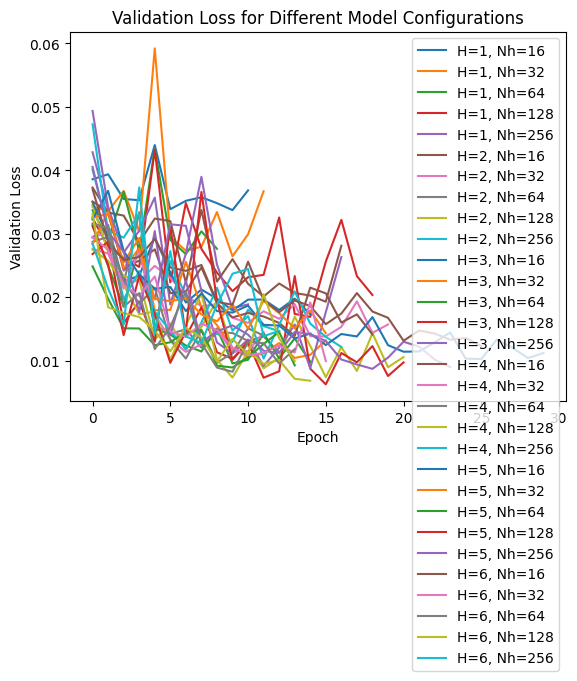

Model with H=1 and Nh=16:
MSE: 0.033897049725055695
MAE: 0.03389705283277736
RMSE: 0.05301254188135312
R-squared: 0.9398717811759868
MAPE: 17.038959197340645%
Model with H=1 and Nh=32:
MSE: 0.027593346312642097
MAE: 0.0275933458806522
RMSE: 0.048216834088796276
R-squared: 0.9502585473436407
MAPE: 15.183797427957103%
Model with H=1 and Nh=64:
MSE: 0.027236664667725563
MAE: 0.02723667158177235
RMSE: 0.03875880402040714
R-squared: 0.9678588200031943
MAPE: 16.174265650409165%
Model with H=1 and Nh=128:
MSE: 0.017298251390457153
MAE: 0.017298255899543476
RMSE: 0.024426879739182308
R-squared: 0.9872339344432272
MAPE: 12.007943946379982%
Model with H=1 and Nh=256:
MSE: 0.01891075074672699
MAE: 0.018910748557337417
RMSE: 0.02660237032349286
R-squared: 0.9848587492585521
MAPE: 10.285606763817686%
Model with H=2 and Nh=16:
MSE: 0.020237356424331665
MAE: 0.020237361278449512
RMSE: 0.02793937093026937
R-squared: 0.9832985441883012
MAPE: 9.590766179185145%
Model with H=2 and Nh=32:
MSE: 0.014137546

In [76]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_Pl_L_Cu_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_Pl_L_Cu_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_Pl_L_Cu_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_Pl_L_Cu_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_Pl_L_Cu_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_Pl_L_Cu_1.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_Pl_L_Cu_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_Pl_L_Cu_1 = model_Pl_L_Cu_1.fit(X_train_Pl_L_Cu_1, y_train_Pl_L_Cu_1, epochs=100, batch_size=32, validation_data=(X_val_Pl_L_Cu_1, y_val_Pl_L_Cu_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_Pl_L_Cu_1[(H, Nh)] = history_Pl_L_Cu_1

        # Evaluate the model on the testing set
        predictions_Pl_L_Cu_1 = model_Pl_L_Cu_1.predict(X_test_Pl_L_Cu_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_Pl_L_Cu_1 = model_Pl_L_Cu_1.evaluate(X_test_Pl_L_Cu_1, y_test_Pl_L_Cu_1)
        mses_Pl_L_Cu_1[(H, Nh)] = mse_Pl_L_Cu_1

        # Calculate Mean Absolute Error (MAE)
        mae_Pl_L_Cu_1 = mean_absolute_error(y_test_Pl_L_Cu_1, predictions_Pl_L_Cu_1)
        maes_Pl_L_Cu_1[(H, Nh)] = mae_Pl_L_Cu_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_Pl_L_Cu_1 = np.sqrt(mean_squared_error(y_test_Pl_L_Cu_1, predictions_Pl_L_Cu_1))
        rmses_Pl_L_Cu_1[(H, Nh)] = rmse_Pl_L_Cu_1

        # Calculate R-squared (R2) Score
        r2_Pl_L_Cu_1 = r2_score(y_test_Pl_L_Cu_1, predictions_Pl_L_Cu_1)
        r2_scores_Pl_L_Cu_1[(H, Nh)] = r2_Pl_L_Cu_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_Pl_L_Cu_1 = np.mean(np.abs((y_test_Pl_L_Cu_1 - predictions_Pl_L_Cu_1) / y_test_Pl_L_Cu_1)) * 100
        mapes_Pl_L_Cu_1[(H, Nh)] = mape_Pl_L_Cu_1

# Plot the validation loss for each configuration
for (H, Nh), history_Pl_L_Cu_1 in histories_Pl_L_Cu_1.items():
    plt.plot(history_Pl_L_Cu_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_Pl_L_Cu_1 in mses_Pl_L_Cu_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_Pl_L_Cu_1}')
    print(f'MAE: {maes_Pl_L_Cu_1[(H, Nh)]}')
    print(f'RMSE: {rmses_Pl_L_Cu_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_Pl_L_Cu_1[(H, Nh)]}')
    print(f'MAPE: {mapes_Pl_L_Cu_1[(H, Nh)]}%')


In [77]:
# Rank combinations based on their MSE values
ranked_combinations_Pl_L_Cu_1 = sorted(mses_Pl_L_Cu_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_Pl_L_Cu_1) in enumerate(ranked_combinations_Pl_L_Cu_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_Pl_L_Cu_1}")


Rank 1: Combination H=3, Nh=128 - MSE: 0.006223749369382858
Rank 2: Combination H=4, Nh=128 - MSE: 0.007335960399359465
Rank 3: Combination H=2, Nh=128 - MSE: 0.007339136209338903
Rank 4: Combination H=5, Nh=256 - MSE: 0.008671201765537262
Rank 5: Combination H=6, Nh=64 - MSE: 0.009003879502415657
Rank 6: Combination H=5, Nh=64 - MSE: 0.009249561466276646
Rank 7: Combination H=3, Nh=64 - MSE: 0.00950292032212019
Rank 8: Combination H=5, Nh=128 - MSE: 0.009585414081811905
Rank 9: Combination H=6, Nh=128 - MSE: 0.009944104589521885
Rank 10: Combination H=5, Nh=16 - MSE: 0.010342719964683056
Rank 11: Combination H=4, Nh=64 - MSE: 0.010409963317215443
Rank 12: Combination H=3, Nh=256 - MSE: 0.0104519072920084
Rank 13: Combination H=4, Nh=256 - MSE: 0.010617575608193874
Rank 14: Combination H=3, Nh=32 - MSE: 0.010749135166406631
Rank 15: Combination H=6, Nh=32 - MSE: 0.010919293388724327
Rank 16: Combination H=4, Nh=32 - MSE: 0.011421071365475655
Rank 17: Combination H=2, Nh=64 - MSE: 0.012

In [84]:
# Specify the combination you want to call
H = 3
Nh = 128

# Retrieve the model for the specified combination
selected_model_Pl_L_Cu_1 = histories_Pl_L_Cu_1[(H, Nh)].model
selected_model_Pl_L_Cu_1.save("model_3_128_Pl_Cu_scaler.h5")
# Use the trained model to make predictions on the testing set
prediction_Pl_L_Cu_1 = selected_model_Pl_L_Cu_1.predict(X_test_Pl_L_Cu_1)
inverse_prediction_Pl_L_Cu_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_Pl_L_Cu_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_Pl_L_Cu_1_1 = selected_model_Pl_L_Cu_1.evaluate(X_test_Pl_L_Cu_1, y_test_Pl_L_Cu_1)
print("Mean Squared Error on Testing Set:", mse_Pl_L_Cu_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_Pl_L_Cu_1[:5])

print("Inverse Predictions:")
print(inverse_prediction_Pl_L_Cu_1[:5])

y_test_print_Pl_L_Cu_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_Pl_L_Cu_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_Pl_L_Cu_1[:5])

181/750 [======>.......................] - ETA: 0s

d:\Software\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 0s 588us/step - loss: 0.0062
Mean Squared Error on Testing Set: 0.006223749369382858
Predictions:
[[0.6213692 ]
 [0.183001  ]
 [0.6471452 ]
 [0.4105516 ]
 [0.24520998]]
Inverse Predictions:
[[1.6238514 ]
 [0.49092337]
 [1.6904675 ]
 [1.0790099 ]
 [0.6516976 ]]
True Values:
[[1.63623509]
 [0.46468755]
 [1.69007496]
 [1.10227304]
 [0.64733476]]


In [86]:

model_default_Pl_L_Cu_1 = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_6_128_Pl_Cu_29_4.h5")
model_minmax_Pl_L_Cu_1 = load_model(r"D:\Krishna\ai-power-converter-1\machine-learning\model_3_128_Pl_Cu_scaler.h5")

prediction_default = model_default_Pl_L_Cu_1.predict(X_test_Pl_L_Cu_1)
prediction_minmax = model_minmax_Pl_L_Cu_1.predict(X_test_Pl_L_Cu_1)

inverse_prediction_Pl_L_Cu_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_minmax)
print("inverse:", inverse_prediction_Pl_L_Cu_1)


# Print the first few predictions
print("Predictions:")
print(prediction_default[:10])

print("Inverse Predictions:")
print(inverse_prediction_Pl_L_Cu_1[:10])


# Print the corresponding true values
print("True Values:")
print(y_test_Pl_L_Cu[:10])

# Calculate mean squared error for prediction_default
mse_default_Pl_L_Cu_1 = mean_squared_error(y_test_Pl_L_Cu, prediction_default)

# Calculate mean squared error for inverse_prediction
mse_inverse_Pl_L_Cu_1 = mean_squared_error(y_test_Pl_L_Cu, inverse_prediction_Pl_L_Cu_1)

print("Mean Squared Error for prediction_default:", mse_default_Pl_L_Cu_1)
print("Mean Squared Error for inverse_prediction:", mse_inverse_Pl_L_Cu_1)


750/750 [==============================] - 0s 547us/step
inverse: [[1.6238514 ]
 [0.49092337]
 [1.6904675 ]
 ...
 [2.2733283 ]
 [0.7769726 ]
 [0.01997907]]
Predictions:
[[1.6226015 ]
 [0.48865005]
 [1.6902393 ]
 [1.0802765 ]
 [0.6509127 ]
 [0.64827037]
 [0.8098144 ]
 [0.31838518]
 [1.1944251 ]
 [0.44464463]]
Inverse Predictions:
[[1.6238514 ]
 [0.49092337]
 [1.6904675 ]
 [1.0790099 ]
 [0.6516976 ]
 [0.6491063 ]
 [0.8188707 ]
 [0.31481364]
 [1.1996307 ]
 [0.434299  ]]
True Values:
[[1.63623509]
 [0.46468755]
 [1.69007496]
 [1.10227304]
 [0.64733476]
 [0.65813231]
 [0.80931417]
 [0.32061796]
 [1.1909221 ]
 [0.35963163]]
Mean Squared Error for prediction_default: 0.0005701191225305363
Mean Squared Error for inverse_prediction: 0.0006616540538980021


## P_D

In [88]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_33x13x13x13.csv")
df_P_D = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_P_D = df_P_D[['L', 'C', 'fsw', "t_dt"]].values

# Extract output (ripples)
y_P_D = df_P_D[["P_D"]].values  # Adjust column names as per your dataset

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_P_D = custom_scaling(X_P_D)
print(X_scaled_P_D[90:])

# Split the dataset into training, validation, and testing sets
X_train_P_D, X_temp_P_D, y_train_P_D, y_temp_P_D = train_test_split(X_scaled, y_P_D, test_size=0.3, random_state=42)
X_val_P_D, X_test_P_D, y_val_P_D, y_test_P_D = train_test_split(X_temp_P_D, y_temp_P_D, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_P_D = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_P_D = {}
maes_P_D = {}
rmses_P_D = {}
r2_scores_P_D = {}
mapes_P_D = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

[[0.         0.01020408 0.21052222 0.52676399]
 [0.         0.01020408 0.21052222 0.57907543]
 [0.         0.01020408 0.21052222 0.63138686]
 ...
 [1.         0.18367347 1.         0.89416058]
 [1.         0.18367347 1.         0.94768856]
 [1.         0.18367347 1.         1.        ]]


Epoch 1/100, Loss: 0.03267645090818405, Val Loss: 0.007365217432379723
Epoch 2/100, Loss: 0.009511018171906471, Val Loss: 0.0074441079050302505
Epoch 3/100, Loss: 0.009261270985007286, Val Loss: 0.007518369238823652
Epoch 4/100, Loss: 0.00926908664405346, Val Loss: 0.0077487146481871605
Epoch 5/100, Loss: 0.009076330810785294, Val Loss: 0.006281566806137562
Epoch 6/100, Loss: 0.009075290523469448, Val Loss: 0.006112313363701105
Epoch 7/100, Loss: 0.008972122333943844, Val Loss: 0.005925576668232679
Epoch 8/100, Loss: 0.008939062245190144, Val Loss: 0.007188290823251009
Epoch 9/100, Loss: 0.008907816372811794, Val Loss: 0.0058781178668141365
Epoch 10/100, Loss: 0.008860201574862003, Val Loss: 0.005652234423905611
Restoring model weights from the end of the best epoch: 5.
Epoch 10: early stopping
750/750 [==============================] - 0s 484us/step - loss: 0.0062
Epoch 1/100, Loss: 0.02615121193230152, Val Loss: 0.005760578904300928
Epoch 2/100, Loss: 0.00828707218170166, Val Loss: 0

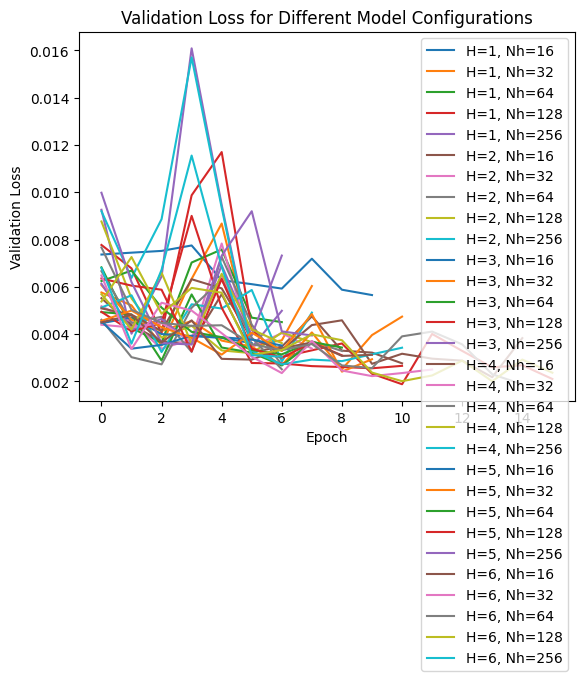

Model with H=1 and Nh=16:
MSE: 0.006159740500152111
MAE: 0.006159744081532271
RMSE: 0.008367861333459056
R-squared: 0.9548230016170771
MAPE: 9.572787871390506%
Model with H=1 and Nh=32:
MSE: 0.003486642148345709
MAE: 0.003486641915854675
RMSE: 0.0045432863082649775
R-squared: 0.9866823181725233
MAPE: 5.464604676788342%
Model with H=1 and Nh=64:
MSE: 0.004188746679574251
MAE: 0.00418874478121031
RMSE: 0.005528428906121637
R-squared: 0.9802806824319309
MAPE: 5.940156289032209%
Model with H=1 and Nh=128:
MSE: 0.0018875651294365525
MAE: 0.0018875655194210863
RMSE: 0.002492182708926072
R-squared: 0.9959927339227396
MAPE: 3.1170124807084174%
Model with H=1 and Nh=256:
MSE: 0.0040211426094174385
MAE: 0.004021143209767758
RMSE: 0.004943151893515767
R-squared: 0.9842349143573053
MAPE: 7.092802811985295%
Model with H=2 and Nh=16:
MSE: 0.003153607016429305
MAE: 0.0031536078745064947
RMSE: 0.004314242049352232
R-squared: 0.9879912601174717
MAPE: 4.457995426116514%
Model with H=2 and Nh=32:
MSE: 0.

In [89]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_P_D = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_P_D.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_P_D.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_P_D.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_P_D.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_P_D.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_P_D.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_P_D = model_P_D.fit(X_train_P_D, y_train_P_D, epochs=100, batch_size=32, validation_data=(X_val_P_D, y_val_P_D), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_P_D[(H, Nh)] = history_P_D

        # Evaluate the model on the testing set
        predictions_P_D = model_P_D.predict(X_test_P_D)

        # Evaluate the model on the testing set and calculate MSE
        mse_P_D = model_P_D.evaluate(X_test_P_D, y_test_P_D)
        mses_P_D[(H, Nh)] = mse_P_D

        # Calculate Mean Absolute Error (MAE)
        mae_P_D = mean_absolute_error(y_test_P_D, predictions_P_D)
        maes_P_D[(H, Nh)] = mae_P_D

        # Calculate Root Mean Squared Error (RMSE)
        rmse_P_D = np.sqrt(mean_squared_error(y_test_P_D, predictions_P_D))
        rmses_P_D[(H, Nh)] = rmse_P_D

        # Calculate R-squared (R2) Score
        r2_P_D = r2_score(y_test_P_D, predictions_P_D)
        r2_scores_P_D[(H, Nh)] = r2_P_D

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_P_D = np.mean(np.abs((y_test_P_D - predictions_P_D) / y_test_P_D)) * 100
        mapes_P_D[(H, Nh)] = mape_P_D

# Plot the validation loss for each configuration
for (H, Nh), history_P_D in histories_P_D.items():
    plt.plot(history_P_D.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_P_D in mses_P_D.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_P_D}')
    print(f'MAE: {maes_P_D[(H, Nh)]}')
    print(f'RMSE: {rmses_P_D[(H, Nh)]}')
    print(f'R-squared: {r2_scores_P_D[(H, Nh)]}')
    print(f'MAPE: {mapes_P_D[(H, Nh)]}%')


In [90]:
# Rank combinations based on their MSE values
ranked_combinations_P_D = sorted(mses_P_D.items(), key=lambda x: x[1])
# Print ranked combinations
for idx, ((H, Nh), mse_P_D) in enumerate(ranked_combinations_P_D, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_P_D}")


Rank 1: Combination H=1, Nh=128 - MSE: 0.0018875651294365525
Rank 2: Combination H=6, Nh=128 - MSE: 0.0019884847570210695
Rank 3: Combination H=6, Nh=32 - MSE: 0.0023669498041272163
Rank 4: Combination H=6, Nh=64 - MSE: 0.002542686415836215
Rank 5: Combination H=4, Nh=16 - MSE: 0.0027111899107694626
Rank 6: Combination H=3, Nh=128 - MSE: 0.0027561660390347242
Rank 7: Combination H=3, Nh=64 - MSE: 0.0028337908443063498
Rank 8: Combination H=6, Nh=16 - MSE: 0.0029478438664227724
Rank 9: Combination H=4, Nh=64 - MSE: 0.0029944314155727625
Rank 10: Combination H=5, Nh=32 - MSE: 0.0031415577977895737
Rank 11: Combination H=2, Nh=16 - MSE: 0.003153607016429305
Rank 12: Combination H=2, Nh=256 - MSE: 0.003212024923413992
Rank 13: Combination H=5, Nh=128 - MSE: 0.0032160289119929075
Rank 14: Combination H=2, Nh=64 - MSE: 0.0032539202366024256
Rank 15: Combination H=4, Nh=256 - MSE: 0.0032729972153902054
Rank 16: Combination H=2, Nh=32 - MSE: 0.0033553140237927437
Rank 17: Combination H=5, Nh=1

In [95]:
# Specify the combination you want to call
H = 2
Nh = 128

# Retrieve the model for the specified combination
selected_model_P_D = histories_P_D[(H, Nh)].model
selected_model_P_D.save("model_2_128_P_D_29_4.h5")
# Use the trained model to make predictions on the testing set
prediction_P_D = selected_model_P_D.predict(X_test_P_D)

# Evaluate the model on the testing set
mse_P_D_3 = selected_model_P_D.evaluate(X_test_P_D, y_test_P_D)
print("Mean Squared Error on Testing Set:", mse_P_D_3)

# Print the first few predictions
print("Predictions:")
print(prediction_P_D[:5])

# Print the corresponding true values
print("True Values:")
print(y_test_P_D[:5])

272/750 [=========>....................] - ETA: 0s

d:\Software\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 0s 561us/step - loss: 0.0038
Mean Squared Error on Testing Set: 0.003812784096226096
Predictions:
[[0.058207  ]
 [0.12780696]
 [0.05429407]
 [0.05467564]
 [0.10499019]]
True Values:
[[0.06506221]
 [0.13715643]
 [0.05960087]
 [0.05289084]
 [0.10150244]]


## P_D scaler

In [91]:


# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
# df = pd.read_csv(r"D:\Krishna\ai-power-converter\dataset\simulation_results_23x13x13x13.csv")
# df_P_D_1 = pd.read_csv(r"D:\Krishna\ai-power-converter\simulation_results_new_20_20_20_20.csv")
df_P_D_1 = pd.read_csv(r"D:\Krishna\ai-power-converter-1\simulation_results_new_20_20_20_20.csv")

# Extract input features (L, C, fsw)
X_P_D_1 = df_P_D_1[['L', 'C', 'fsw', "t_dt"]].values
# print(X_P_D_1[-10:])

# Extract output (ripples)
y_P_D_1 = df_P_D_1[["P_D"]].values  # Adjust column names as per your dataset

scaler_y_new_20_20_20_20 = MinMaxScaler(feature_range=(0, 1))


# Fit the scaler to your target variable and transform it
y_scaled_P_D_1 = scaler_y_new_20_20_20_20.fit_transform(y_P_D_1)

# Define custom scaling ranges for each input feature
L_min, L_max = 30e-6, 2000e-6
C_min, C_max = 20e-6, 1000e-6
fsw_min, fsw_max = 20e3, 200e3
t_dt_min, t_dt_max = 0.178e-6, 1e-6

X_scaled_P_D_1 = custom_scaling_minmax(X_P_D_1)
# print(X_scaled_P_D_1[-10:])

# Split the dataset into training, validation, and testing sets
X_train_P_D_1, X_temp_P_D_1, y_train_P_D_1, y_temp_P_D_1 = train_test_split(X_scaled_P_D_1, y_scaled_P_D_1, test_size=0.3, random_state=42)
X_val_P_D_1, X_test_P_D_1, y_val_P_D_1, y_test_P_D_1 = train_test_split(X_temp_P_D_1, y_temp_P_D_1, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)# Initialize a dictionary to store the training history for each configuration


histories_P_D_1 = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses_P_D_1 = {}
maes_P_D_1 = {}
rmses_P_D_1 = {}
r2_scores_P_D_1 = {}
mapes_P_D_1 = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer

Epoch 1/100, Loss: 0.06409427523612976, Val Loss: 0.02551424689590931
Epoch 2/100, Loss: 0.04527846723794937, Val Loss: 0.024439821019768715
Epoch 3/100, Loss: 0.04360286518931389, Val Loss: 0.017700718715786934
Epoch 4/100, Loss: 0.04365099221467972, Val Loss: 0.01900327205657959
Epoch 5/100, Loss: 0.04404807835817337, Val Loss: 0.01751428283751011
Epoch 6/100, Loss: 0.043823543936014175, Val Loss: 0.023144269362092018
Epoch 7/100, Loss: 0.04325638338923454, Val Loss: 0.023120732977986336
Epoch 8/100, Loss: 0.04338254779577255, Val Loss: 0.03468383476138115
Restoring model weights from the end of the best epoch: 3.
Epoch 8: early stopping
750/750 [==============================] - 0s 501us/step - loss: 0.0174
Epoch 1/100, Loss: 0.05323692038655281, Val Loss: 0.020242609083652496
Epoch 2/100, Loss: 0.043414294719696045, Val Loss: 0.03461205214262009
Epoch 3/100, Loss: 0.041536953300237656, Val Loss: 0.018525417894124985
Epoch 4/100, Loss: 0.04132142290472984, Val Loss: 0.01896152272820

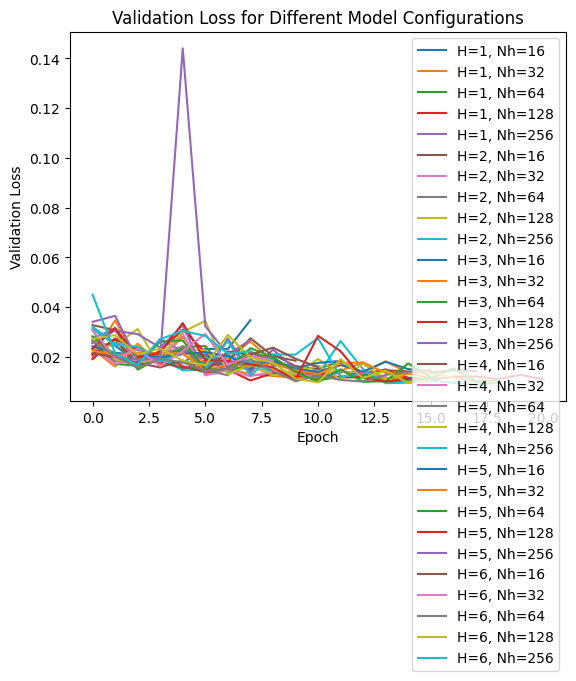

Model with H=1 and Nh=16:
MSE: 0.017410213127732277
MAE: 0.017410213982097376
RMSE: 0.023272895033615393
R-squared: 0.9903152134900318
MAPE: 7.11949958227566%
Model with H=1 and Nh=32:
MSE: 0.013603082858026028
MAE: 0.013603088603674787
RMSE: 0.018209920602023866
R-squared: 0.9940706739229587
MAPE: 7.4405238903214235%
Model with H=1 and Nh=64:
MSE: 0.010509810410439968
MAE: 0.010509810990010969
RMSE: 0.015281380467896115
R-squared: 0.995824443086695
MAPE: 7.814964255985098%
Model with H=1 and Nh=128:
MSE: 0.010646702721714973
MAE: 0.010646698534042306
RMSE: 0.014712498605051243
R-squared: 0.9961295443136141
MAPE: 6.91823010910807%
Model with H=1 and Nh=256:
MSE: 0.0165988989174366
MAE: 0.01659890267970056
RMSE: 0.021418082531314622
R-squared: 0.991797421306486
MAPE: 8.659471252158472%
Model with H=2 and Nh=16:
MSE: 0.01319286972284317
MAE: 0.013192869861545853
RMSE: 0.018498313718328673
R-squared: 0.9938813795886943
MAPE: 4.762186615243092%
Model with H=2 and Nh=32:
MSE: 0.012124476023

In [92]:

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model_P_D_1 = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model_P_D_1.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(4,)))  
        model_P_D_1.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model_P_D_1.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model_P_D_1.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model_P_D_1.add(tf.keras.layers.Dense(1, activation='softplus'))  

        # Compile the model
        model_P_D_1.compile(optimizer='adam', loss='mean_absolute_error')

        # Train the model and store the training history
    # Train the model with given hyperparameters
        history_P_D_1 = model_P_D_1.fit(X_train_P_D_1, y_train_P_D_1, epochs=100, batch_size=32, validation_data=(X_val_P_D_1, y_val_P_D_1), 
                        callbacks=[PrintEpochInfo(), lr_scheduler, early_stopping], verbose=0)
    
        histories_P_D_1[(H, Nh)] = history_P_D_1

        # Evaluate the model on the testing set
        predictions_P_D_1 = model_P_D_1.predict(X_test_P_D_1)

        # Evaluate the model on the testing set and calculate MSE
        mse_P_D_1 = model_P_D_1.evaluate(X_test_P_D_1, y_test_P_D_1)
        mses_P_D_1[(H, Nh)] = mse_P_D_1

        # Calculate Mean Absolute Error (MAE)
        mae_P_D_1 = mean_absolute_error(y_test_P_D_1, predictions_P_D_1)
        maes_P_D_1[(H, Nh)] = mae_P_D_1

        # Calculate Root Mean Squared Error (RMSE)
        rmse_P_D_1 = np.sqrt(mean_squared_error(y_test_P_D_1, predictions_P_D_1))
        rmses_P_D_1[(H, Nh)] = rmse_P_D_1

        # Calculate R-squared (R2) Score
        r2_P_D_1 = r2_score(y_test_P_D_1, predictions_P_D_1)
        r2_scores_P_D_1[(H, Nh)] = r2_P_D_1

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_P_D_1 = np.mean(np.abs((y_test_P_D_1 - predictions_P_D_1) / y_test_P_D_1)) * 100
        mapes_P_D_1[(H, Nh)] = mape_P_D_1

# Plot the validation loss for each configuration
for (H, Nh), history_P_D_1 in histories_P_D_1.items():
    plt.plot(history_P_D_1.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse_P_D_1 in mses_P_D_1.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse_P_D_1}')
    print(f'MAE: {maes_P_D_1[(H, Nh)]}')
    print(f'RMSE: {rmses_P_D_1[(H, Nh)]}')
    print(f'R-squared: {r2_scores_P_D_1[(H, Nh)]}')
    print(f'MAPE: {mapes_P_D_1[(H, Nh)]}%')


In [93]:
# Rank combinations based on their MSE values
ranked_combinations_P_D_1 = sorted(mses_P_D_1.items(), key=lambda x: x[1])

# Print ranked combinations
for idx, ((H, Nh), mse_P_D_1) in enumerate(ranked_combinations_P_D_1, start=1):
    print(f"Rank {idx}: Combination H={H}, Nh={Nh} - MSE: {mse_P_D_1}")


Rank 1: Combination H=2, Nh=256 - MSE: 0.009272340685129166
Rank 2: Combination H=3, Nh=32 - MSE: 0.009322126396000385
Rank 3: Combination H=6, Nh=128 - MSE: 0.00953582301735878
Rank 4: Combination H=5, Nh=64 - MSE: 0.009595436044037342
Rank 5: Combination H=3, Nh=64 - MSE: 0.00987513829022646
Rank 6: Combination H=6, Nh=64 - MSE: 0.009995769709348679
Rank 7: Combination H=3, Nh=128 - MSE: 0.010401371866464615
Rank 8: Combination H=1, Nh=64 - MSE: 0.010509810410439968
Rank 9: Combination H=4, Nh=128 - MSE: 0.010608606040477753
Rank 10: Combination H=5, Nh=128 - MSE: 0.01061573252081871
Rank 11: Combination H=1, Nh=128 - MSE: 0.010646702721714973
Rank 12: Combination H=2, Nh=32 - MSE: 0.01212447602301836
Rank 13: Combination H=4, Nh=32 - MSE: 0.012227071449160576
Rank 14: Combination H=4, Nh=64 - MSE: 0.012467615306377411
Rank 15: Combination H=4, Nh=256 - MSE: 0.012549279257655144
Rank 16: Combination H=5, Nh=32 - MSE: 0.012851281091570854
Rank 17: Combination H=3, Nh=256 - MSE: 0.0128

In [94]:
# Specify the combination you want to call
H = 2
Nh = 256

# Retrieve the model for the specified combination
selected_model_P_D_1 = histories_P_D_1[(H, Nh)].model
selected_model_P_D_1.save("model_2_256_P_D_scaler.h5")
# Use the trained model to make predictions on the testing set
prediction_P_D_1 = selected_model_P_D_1.predict(X_test_P_D_1)
inverse_prediction_P_D_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_P_D_1)
# print("inverse:", inverse_prediction)

# Evaluate the model on the testing set
mse_P_D_1_1 = selected_model_P_D_1.evaluate(X_test_P_D_1, y_test_P_D_1)
print("Mean Squared Error on Testing Set:", mse_P_D_1_1)

# Print the first few predictions
print("Predictions:")
print(prediction_P_D_1[:5])

print("Inverse Predictions:")
print(inverse_prediction_P_D_1[:5])

y_test_print_P_D_1 = scaler_y_new_20_20_20_20.inverse_transform(y_test_P_D_1)
# Print the corresponding true values
print("True Values:")
print(y_test_print_P_D_1[:5])

156/750 [=====>........................] - ETA: 0s

d:\Software\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 0s 591us/step - loss: 0.0093
Mean Squared Error on Testing Set: 0.009272340685129166
Predictions:
[[0.35554257]
 [0.77069134]
 [0.31185585]
 [0.26836467]
 [0.57856506]]
Inverse Predictions:
[[0.06572666]
 [0.13483877]
 [0.05845389]
 [0.05121367]
 [0.10285445]]
True Values:
[[0.06506221]
 [0.13715643]
 [0.05960087]
 [0.05289084]
 [0.10150244]]


In [ ]:

model_default_P_D_1 = load_model(r"E:\ai-power-converter\machine-learning\model_4_128_P_D_1_2.h5")
model_minmax_P_D_1 = load_model(r"E:\ai-power-converter\machine-learning\model_5_256_P_D_1_test.h5")

prediction_default = model_default_P_D_1.predict(X_test_P_D_1)
prediction_minmax = model_minmax_P_D_1.predict(X_test_P_D_1)

inverse_prediction_P_D_1 = scaler_y_new_20_20_20_20.inverse_transform(prediction_minmax)
print("inverse:", inverse_prediction_P_D_1)


# Print the first few predictions
print("Predictions:")
print(prediction_default[:10])

print("Inverse Predictions:")
print(inverse_prediction_P_D_1[:10])


# Print the corresponding true values
print("True Values:")
print(y_test_P_D_1[:10])

# Calculate mean squared error for prediction_default
mse_default_P_D_1 = mean_squared_error(y_test_P_D_1, prediction_default)

# Calculate mean squared error for inverse_prediction
mse_inverse_P_D_1 = mean_squared_error(y_test_P_D_1, inverse_prediction_P_D_1)

print("Mean Squared Error for prediction_default:", mse_default_P_D_1)
print("Mean Squared Error for inverse_prediction:", mse_inverse_P_D_1)
